# load functions

In [87]:
suppressMessages(suppressWarnings(source("./jupyter_common.R")))
suppressMessages(suppressWarnings(source("./function/enrichplot/gseaplot3.R")))
load('./rdata/jupyter_common.rdata')
load('./rdata/riboprof_170224.rdna_rn18s_161021.rdna_rn18s_limma-voom.mrna.rdata')
head(df_all)

,seqnames,start,end,width,strand,source,unt.transcription,tgfb.transcription,tgfbCX5461.transcription,log2FCuntVStgfb.transcription,...,log2FCuntVStgfb.translation,FDRuntVStgfb.translation,PuntVStgfb.translation,log2FCtgfbVStgfbCX5461.translation,FDRtgfbVStgfbCX5461.translation,PtgfbVStgfbCX5461.translation,unt.tgfb.DEtranslation,tgfb.tgfbCX5461.DEtranslation,reversible.translation,biotype
,<fct>,<int>,<int>,<int>,<fct>,<fct>,<dbl>,<dbl>,<dbl>,<dbl>,...,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<chr>,<chr>,<chr>,<chr>
0610009B22Rik,11,51576213,51579701,3489,-,ensembl_havana,-1.7361927,-1.77777696,-1.52337076,-0.04158431,...,-0.4414281,0.30541555,0.14036813,1.02171324,0.02919136,0.002929355,notSig,up,notSig,protein_coding
0610009E02Rik,2,26335708,26349402,13695,+,havana,-4.4542278,-5.89842646,-5.22659361,-1.44419866,...,NA,NA,NA,NA,NA,NA,NA,NA,NA,lncRNA
0610009L18Rik,11,120239504,120242016,2513,+,ensembl_havana,-5.7348513,-5.04982074,-5.32317910,0.68503055,...,NA,NA,NA,NA,NA,NA,NA,NA,NA,lncRNA
0610010F05Rik,11,23514961,23583639,68679,-,ensembl_havana,-0.5443124,-0.18299550,-0.57995446,0.36131693,...,0.3259794,0.64123254,0.45306626,-0.78689319,0.41800085,0.183428443,notSig,notSig,notSig,protein_coding
0610010K14Rik,11,70126032,70128740,2709,-,ensembl_havana,-1.0822802,-1.73978964,-1.85796767,-0.65750941,...,-1.4347083,0.05167993,0.01144092,1.51410985,0.07704533,0.012849451,notSig,notSig,notSig,protein_coding
0610012G03Rik,16,31765868,31767312,1445,-,havana,0.1094487,0.09824498,0.09778162,-0.01120375,...,-0.5530121,0.13823240,0.04346982,0.01520704,0.98121037,0.964044006,notSig,notSig,notSig,protein_coding


# common parameters

In [72]:
f_remove_pseudogene <- TRUE
seed_gsea <- 40
seed_geom_text_repel <- 40

# common variables

In [73]:
f <- grepl('pseudogene', df_all$biotype)
df_pseudogene <- df_all[f,]
head(df_pseudogene)
pseudogenes <- rownames(df_pseudogene)

head(pseudogenes)
length(pseudogenes)

,seqnames,start,end,width,strand,source,unt.transcription,tgfb.transcription,tgfbCX5461.transcription,log2FCuntVStgfb.transcription,...,log2FCuntVStgfb.translation,FDRuntVStgfb.translation,PuntVStgfb.translation,log2FCtgfbVStgfbCX5461.translation,FDRtgfbVStgfbCX5461.translation,PtgfbVStgfbCX5461.translation,unt.tgfb.DEtranslation,tgfb.tgfbCX5461.DEtranslation,reversible.translation,biotype
,<fct>,<int>,<int>,<int>,<fct>,<fct>,<dbl>,<dbl>,<dbl>,<dbl>,...,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<chr>,<chr>,<chr>,<chr>
1810014B01Rik,10,86521389,86530670,9282,+,havana,-2.8286057,-4.4853001,-4.1425466,-1.65669444,...,-0.3564913,0.84029959,0.72410834,-0.4169549,0.8829556,0.75733425,notSig,notSig,notSig,transcribed_unprocessed_pseudogene
2610005L07Rik,8,20016466,20055498,39033,+,havana,-0.3642834,-0.3366501,-0.4971759,0.02763331,...,-0.5236001,0.09822444,0.02692798,0.5542807,0.1687514,0.04116814,notSig,notSig,notSig,transcribed_unprocessed_pseudogene
2700099C18Rik,17,95057528,95082560,25033,+,havana,-3.1993504,-4.2285648,-5.3041198,-1.02921442,...,-2.4558864,0.14513772,0.04658488,1.7262810,0.4633478,0.22159443,notSig,notSig,notSig,transcribed_unprocessed_pseudogene
2810025M15Rik,1,157239922,157247806,7885,+,ensembl_havana,-0.6030111,-0.7441168,-0.9447124,-0.14110568,...,-0.1405096,0.84319936,0.72766180,0.1031268,0.9218463,0.82949263,notSig,notSig,notSig,transcribed_processed_pseudogene
3000002C10Rik,9,109657011,109661774,4764,-,ensembl_havana,-3.3429596,-4.1075866,-3.9474193,-0.76462696,...,NA,NA,NA,NA,NA,NA,NA,NA,NA,transcribed_processed_pseudogene
3110053B16Rik,12,20924126,20971263,47138,-,havana,-3.9591801,-3.9958193,-3.8926421,-0.03663918,...,NA,NA,NA,NA,NA,NA,NA,NA,NA,transcribed_unprocessed_pseudogene


[1] "1810014B01Rik" "2610005L07Rik" "2700099C18Rik" "2810025M15Rik"
[5] "3000002C10Rik" "3110053B16Rik"

[1] 1746

# riboseq.unt48.tgfb48

In [74]:
condstr <- 'riboseq.unt.tgfb'

In [75]:
sym_up <- sym_ribo_up
if (f_remove_pseudogene) sym_up <- setdiff(sym_up, pseudogenes)
n_up <- length(sym_up)
n_up

sym_dn <- sym_ribo_dn
if (f_remove_pseudogene) sym_dn <- setdiff(sym_dn, pseudogenes)
n_dn <- length(sym_dn)
n_dn

sym_up_dn <- union(sym_up, sym_dn)
n_up_dn <- length(sym_up_dn)
n_up_dn

[1] 1247

[1] 1128

[1] 2375

## all genes

### GSEA

In [76]:
library(clusterProfiler)
library(DOSE)
library(msigdbr)
library(enrichplot)
colnames(df_all)
nv <- sign(df_all$log2FCuntVStgfb.translation)*(-log10(df_all$PuntVStgfb.translation))
names(nv) <- rownames(df_all);
f <- is.finite(nv); t <- min(nv[f]); nv[nv < t] <- t*1.1; t <- max(nv[f]); nv[nv > t] <- t*1.1



gmt_mus <- msigdbr(species = "mouse", category = "C2", subcategory = "CP:KEGG") %>% 
  dplyr::select(gs_name, gene_symbol)

### 50 Hallmark pathway analysis; http://www.gsea-msigdb.org/gsea/msigdb/collection_details.jsp#H
h_gene_sets = msigdbr(species = "mouse", category = "H") %>%
  dplyr::select(gs_name, gene_symbol)

set.seed(seed_gsea)
gsea_all <- GSEA(sort(nv[!is.na(nv)], decreasing=T), exponent =1,
                 nPerm = 10000, minGSSize = 5, maxGSSize = 500,   
                 pvalueCutoff = 0.05, pAdjustMethod = "BH", 
                 TERM2GENE=gmt_mus, TERM2NAME=NA, seed=FALSE, by="fgsea")

head(gsea_all); dim(gsea_all)

gsea_h_gene_sets <- GSEA(sort(nv[!is.na(nv)], decreasing=T), exponent =1,
                         nPerm = 10000, minGSSize = 5, maxGSSize = 500,   
                         pvalueCutoff = 0.05, pAdjustMethod = "BH", 
                         TERM2GENE=h_gene_sets, TERM2NAME=NA, seed=FALSE, by="fgsea")
head(gsea_h_gene_sets); dim(gsea_h_gene_sets)

gsea_h_gene_sets@result %>% 
  dplyr::select(enrichmentScore,  NES, p.adjust) %>% 
  arrange(desc(enrichmentScore)) %>% 
  write.csv(., file = sprintf('table/%s.all.gsea.h%s.csv', condstr, type_gmt))



type_gmt <- ''
#fname_gmt <- sprintf("./data/msigdb_gmt_mouse%s/h.all.v6.1.symbols_mouse%s.gmt", type_gmt, type_gmt)
#gmt_h <- read.gmt(fname_gmt)

#set.seed(seed_gsea)
#gsea_all <- GSEA(sort(nv[!is.na(nv)], decreasing=T), exponent =1,
#                nPerm = 10000, minGSSize = 10, maxGSSize = 500,   
#                pvalueCutoff = 0.05, pAdjustMethod = "BH", 
#                TERM2GENE=gmt_h, TERM2NAME=NA, seed=FALSE, by="fgsea")
#gsea_all <- setReadable(gsea_all, OrgDb=org.Mm.eg.db, keyType="ENTREZID")

#head(gsea_all)
#dim(gsea_all)

write.table(gsea_h_gene_sets, file = sprintf('table/%s.all.gsea.h%s.txt', condstr, type_gmt),
            row.names = TRUE , col.names = NA ,  sep="\t"  , quote = FALSE  )

[1] "seqnames"                            
 [2] "start"                               
 [3] "end"                                 
 [4] "width"                               
 [5] "strand"                              
 [6] "source"                              
 [7] "unt.transcription"                   
 [8] "tgfb.transcription"                  
 [9] "tgfbCX5461.transcription"            
[10] "log2FCuntVStgfb.transcription"       
[11] "FDRuntVStgfb.transcription"          
[12] "PuntVStgfb.transcription"            
[13] "log2FCtgfbVStgfbCX5461.transcription"
[14] "FDRtgfbVStgfbCX5461.transcription"   
[15] "PtgfbVStgfbCX5461.transcription"     
[16] "unt.tgfb.DEtranscription"            
[17] "tgfb.tgfbCX5461.DEtranscription"     
[18] "reversible.transcription"            
[19] "unt.translation"                     
[20] "tgfb.translation"                    
[21] "tgfbCX5461.translation"              
[22] "log2FCuntVStgfb.translation"         
[23] "FDRuntVStgfb.translation"            
[24] "PuntVStgfb.translation"              
[25] "log2FCtgfbVStgfbCX5461.translation"  
[26] "FDRtgfbVStgfbCX5461.translation"     
[27] "PtgfbVStgfbCX5461.translation"       
[28] "unt.tgfb.DEtranslation"              
[29] "tgfb.tgfbCX5461.DEtranslation"       
[30] "reversible.translation"              
[31] "biotype"

preparing geneSet collections...

GSEA analysis...

Warning message in .GSEA(geneList = geneList, exponent = exponent, minGSSize = minGSSize, :
"We do not recommend using nPerm parameter incurrent and future releases"
Warning message in fgsea(pathways = geneSets, stats = geneList, nperm = nPerm, minSize = minGSSize, :
"You are trying to run fgseaSimple. It is recommended to use fgseaMultilevel. To run fgseaMultilevel, you need to remove the nperm argument in the fgsea function call."
Warning message in preparePathwaysAndStats(pathways, stats, minSize, maxSize, gseaParam, :
"There are ties in the preranked stats (2.16% of the list).
The order of those tied genes will be arbitrary, which may produce unexpected results."
leading edge analysis...

done...



,ID,Description,setSize,enrichmentScore,NES,pvalue,p.adjust,qvalues,rank,leading_edge,core_enrichment
,<chr>,<chr>,<int>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<chr>,<chr>
KEGG_REGULATION_OF_ACTIN_CYTOSKELETON,KEGG_REGULATION_OF_ACTIN_CYTOSKELETON,KEGG_REGULATION_OF_ACTIN_CYTOSKELETON,128,0.5612306,1.793482,0.0001530222,0.003568964,0.002656745,887,"tags=21%, list=7%, signal=20%",Actb/Actn1/Baiap2/Fn1/Gsn/Itga5/Itgb1/Itgb3/Msn/Myh9/Pdgfb/Tmsb4x/Vcl/Itgav/Itgb6/Fgd3/Itgb5/Pdgfa/Bcar1/Itga2/Actn4/Actg1/Rras/Myl12a/Ssh3/Pdgfrb/Cd14
KEGG_FOCAL_ADHESION,KEGG_FOCAL_ADHESION,KEGG_FOCAL_ADHESION,126,0.6440496,2.054944,0.0001535155,0.003568964,0.002656745,881,"tags=29%, list=7%, signal=27%",Actb/Actn1/Col4a1/Col4a2/Fn1/Itga5/Itgb1/Itgb3/Lamb3/Pdgfb/Spp1/Thbs1/Vcl/Zyx/Itgav/Capn2/Flnb/Itgb6/Col5a1/Itgb5/Tln1/Pdgfa/Col1a1/Bcar1/Jun/Vegfa/Itga2/Flna/Ilk/Actn4/Actg1/Col5a3/Lamb1/Myl12a/Tln2/Col6a1/Pdgfrb
KEGG_CYTOKINE_CYTOKINE_RECEPTOR_INTERACTION,KEGG_CYTOKINE_CYTOKINE_RECEPTOR_INTERACTION,KEGG_CYTOKINE_CYTOKINE_RECEPTOR_INTERACTION,69,0.6077957,1.788023,0.0001625752,0.003568964,0.002656745,1264,"tags=33%, list=11%, signal=30%",Ccl2/Clcf1/Csf1/Il11/Lif/Pdgfb/Inhba/Pdgfa/Acvr1/Ccl7/Tgfbr1/Tnfrsf1b/Vegfa/Csf2/Tgfb2/Relt/Ifnar1/Pdgfrb/Tgfb1/Vegfc/Il18rap/Il17ra/Il6
KEGG_ECM_RECEPTOR_INTERACTION,KEGG_ECM_RECEPTOR_INTERACTION,KEGG_ECM_RECEPTOR_INTERACTION,38,0.8328908,2.202516,0.0001719395,0.003568964,0.002656745,851,"tags=63%, list=7%, signal=59%",Cd44/Col4a1/Col4a2/Fn1/Hspg2/Itga5/Itgb1/Itgb3/Lamb3/Spp1/Thbs1/Itgav/Itgb6/Sdc1/Col5a1/Itgb5/Col1a1/Sdc3/Itga2/Agrn/Col5a3/Lamb1/Dag1/Col6a1
KEGG_DILATED_CARDIOMYOPATHY,KEGG_DILATED_CARDIOMYOPATHY,KEGG_DILATED_CARDIOMYOPATHY,35,0.7308588,1.906433,0.0001724733,0.003568964,0.002656745,1244,"tags=54%, list=10%, signal=49%",Actb/Itga5/Itgb1/Itgb3/Itgav/Itgb6/Itgb5/Gnas/Tpm1/Tpm4/Itga2/Actg1/Tgfb2/Tnnt2/Dag1/Tgfb1/Cacna2d1/Cacnb3/Lmna
KEGG_HYPERTROPHIC_CARDIOMYOPATHY_HCM,KEGG_HYPERTROPHIC_CARDIOMYOPATHY_HCM,KEGG_HYPERTROPHIC_CARDIOMYOPATHY_HCM,36,0.7161908,1.876006,0.0001725328,0.003568964,0.002656745,1264,"tags=56%, list=11%, signal=50%",Actb/Itga5/Itgb1/Itgb3/Itgav/Itgb6/Itgb5/Tpm1/Tpm4/Itga2/Actg1/Tgfb2/Tnnt2/Dag1/Tgfb1/Cacna2d1/Prkaa1/Cacnb3/Lmna/Il6


[1] 37 11

preparing geneSet collections...

GSEA analysis...

Warning message in .GSEA(geneList = geneList, exponent = exponent, minGSSize = minGSSize, :
"We do not recommend using nPerm parameter incurrent and future releases"
Warning message in fgsea(pathways = geneSets, stats = geneList, nperm = nPerm, minSize = minGSSize, :
"You are trying to run fgseaSimple. It is recommended to use fgseaMultilevel. To run fgseaMultilevel, you need to remove the nperm argument in the fgsea function call."
Warning message in preparePathwaysAndStats(pathways, stats, minSize, maxSize, gseaParam, :
"There are ties in the preranked stats (2.16% of the list).
The order of those tied genes will be arbitrary, which may produce unexpected results."
leading edge analysis...

done...



,ID,Description,setSize,enrichmentScore,NES,pvalue,p.adjust,qvalues,rank,leading_edge,core_enrichment
,<chr>,<chr>,<int>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<chr>,<chr>
HALLMARK_MITOTIC_SPINDLE,HALLMARK_MITOTIC_SPINDLE,HALLMARK_MITOTIC_SPINDLE,185,0.5239301,1.746606,0.0001455180,0.0008936071,0.0003574429,1827,"tags=29%, list=15%, signal=25%",Gsn/Myh9/Palld/Vcl/Epb41l2/Flnb/Nedd9/Septin9/Sun2/Notch2/Llgl1/Stk38l/Bcar1/Capzb/Map1s/Myo1e/Sptan1/Flna/Tuba4a/Actn4/Marcks/Abr/Cdc27/Cdc42ep1/Stau1/Clasp1/Tbcd/Shroom1/Numa1/Trio/Hdac6/Klc1/Lmnb1/Ophn1/Myo9b/Sptbn1/Abl1/Alms1/Bcr/Cdc42bpa/Kif4/Nin/Tubd1/Mapre1/Rasa1/Dync1h1/Cep72/Bcl2l11/Plekhg2/Als2/Pcm1/Pkd2/Cep192
HALLMARK_TNFA_SIGNALING_VIA_NFKB,HALLMARK_TNFA_SIGNALING_VIA_NFKB,HALLMARK_TNFA_SIGNALING_VIA_NFKB,150,0.6201076,2.014228,0.0001490091,0.0008936071,0.0003574429,803,"tags=39%, list=7%, signal=37%",Bhlhe40/Ccl2/Ccn1/Cd44/Clcf1/Csf1/F3/Gadd45b/Jag1/Klf10/Lamb3/Lif/Nfkbia/Ptgs2/Rhob/Sat1/Serpine1/Sgk1/Tnfaip3/B4galt1/Gadd45a/Ier3/Inhba/Hes1/Pmepa1/Dusp4/Hbegf/Pfkfb3/Junb/Irf1/Rnf19b/Fosb/Nfkb2/Litaf/Sphk1/Spsb1/Fosl2/Dusp2/Dusp5/Jun/Trib1/Vegfa/Csf2/Tnip1/Tgif1/Edn1/B4galt5/Olr1/Tubb2a/Tsc22d1/Plk2/Tiparp/Ier5/Maff/Tnip2/Ehd1/Marcks/Plau/Klf6
HALLMARK_IL2_STAT5_SIGNALING,HALLMARK_IL2_STAT5_SIGNALING,HALLMARK_IL2_STAT5_SIGNALING,119,0.5508972,1.734644,0.0001550628,0.0008936071,0.0003574429,851,"tags=28%, list=7%, signal=26%",Bhlhe40/Cd44/Csf1/Gadd45b/Lif/Nt5e/Plin2/Rhob/Spp1/Tgm2/Prnp/Itgav/Pim1/Cd81/Hk2/Eno3/Wls/Cish/Capg/Ecm1/Tnfrsf1b/Lrrc8c/Glipr2/Csf2/Myo1e/Selp/Ckap4/Ahr/Maff/Dhrs3/Myo1c/Klf6/Col6a1
HALLMARK_COMPLEMENT,HALLMARK_COMPLEMENT,HALLMARK_COMPLEMENT,114,0.5942426,1.863308,0.0001551831,0.0008936071,0.0003574429,1150,"tags=32%, list=10%, signal=29%",Clu/Col4a2/Csrp1/Ctsl/F3/Fn1/Lrp1/Mmp14/Pdgfb/Serpine1/Tnfaip3/Calm1/Cp/Pim1/Pla2g4a/Timp1/Irf1/Dusp5/Lipa/Zeb1/Lgmn/Cblb/Olr1/Maff/Ehd1/Ctsc/Anxa5/Prcp/Cebpb/Notch4/Xpnpep1/Prep/Usp15/Jak2/Prkcd/Lta4h
HALLMARK_APICAL_JUNCTION,HALLMARK_APICAL_JUNCTION,HALLMARK_APICAL_JUNCTION,112,0.6091480,1.905679,0.0001554968,0.0008936071,0.0003574429,903,"tags=29%, list=8%, signal=27%",Actb/Actn1/Baiap2/Bmp1/Itgb1/Jup/Lamb3/Msn/Myh9/Vcl/Zyx/B4galt1/Epb41l2/Cnn2/Cdh6/Map3k20/Rsu1/Cldn4/Sdc3/Itga2/Mmp9/Skap2/Plcg1/Acta1/Actn4/Cap1/Nectin2/Actg1/Atp1a3/Rras/Nectin3/Pcdh1
HALLMARK_EPITHELIAL_MESENCHYMAL_TRANSITION,HALLMARK_EPITHELIAL_MESENCHYMAL_TRANSITION,HALLMARK_EPITHELIAL_MESENCHYMAL_TRANSITION,108,0.8144037,2.532294,0.0001566416,0.0008936071,0.0003574429,923,"tags=64%, list=8%, signal=60%",Bmp1/Cald1/Ccn1/Ccn2/Cd44/Col12a1/Col4a1/Col4a2/Colgalt1/Fbln2/Fn1/Gadd45b/Itga5/Itgb1/Itgb3/Lrp1/Mmp14/Nt5e/Plod2/Rhob/Sat1/Serpine1/Sparc/Spp1/Tgm2/Thbs1/Tnfaip3/Gadd45a/Inhba/Itgav/Pmepa1/Cdh2/Cdh6/Sdc1/Timp1/Glipr1/Vim/Col5a1/Efemp2/Itgb5/Capg/Col7a1/Loxl2/Tpm1/Notch2/Ecm1/Qsox1/Tpm4/Col1a1/Jun/Tagln/Pvr/Gja1/Plod1/Vegfa/Lgals1/Itga2/Flna/Adam12/Gpc1/Bdnf/Col5a3/Fermt2/Crlf1/Copa/Pmp22/Pdgfrb/Acta2/Tgfb1


[1] 25 11

#### volcano plot

,ID,Description,setSize,enrichmentScore,NES,pvalue,p.adjust,qvalues,rank,leading_edge,core_enrichment,meanlog2fc,sig
,<chr>,<chr>,<int>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<chr>,<chr>,<dbl>,<chr>
HALLMARK_APICAL_JUNCTION,HALLMARK_APICAL_JUNCTION,HALLMARK_APICAL_JUNCTION,112,0.6091480,1.905679,0.0001554968,0.0008936071,0.0003574429,903,"tags=29%, list=8%, signal=27%",Actb/Actn1/Baiap2/Bmp1/Itgb1/Jup/Lamb3/Msn/Myh9/Vcl/Zyx/B4galt1/Epb41l2/Cnn2/Cdh6/Map3k20/Rsu1/Cldn4/Sdc3/Itga2/Mmp9/Skap2/Plcg1/Acta1/Actn4/Cap1/Nectin2/Actg1/Atp1a3/Rras/Nectin3/Pcdh1,1.833013,up
HALLMARK_EPITHELIAL_MESENCHYMAL_TRANSITION,HALLMARK_EPITHELIAL_MESENCHYMAL_TRANSITION,HALLMARK_EPITHELIAL_MESENCHYMAL_TRANSITION,108,0.8144037,2.532294,0.0001566416,0.0008936071,0.0003574429,923,"tags=64%, list=8%, signal=60%",Bmp1/Cald1/Ccn1/Ccn2/Cd44/Col12a1/Col4a1/Col4a2/Colgalt1/Fbln2/Fn1/Gadd45b/Itga5/Itgb1/Itgb3/Lrp1/Mmp14/Nt5e/Plod2/Rhob/Sat1/Serpine1/Sparc/Spp1/Tgm2/Thbs1/Tnfaip3/Gadd45a/Inhba/Itgav/Pmepa1/Cdh2/Cdh6/Sdc1/Timp1/Glipr1/Vim/Col5a1/Efemp2/Itgb5/Capg/Col7a1/Loxl2/Tpm1/Notch2/Ecm1/Qsox1/Tpm4/Col1a1/Jun/Tagln/Pvr/Gja1/Plod1/Vegfa/Lgals1/Itga2/Flna/Adam12/Gpc1/Bdnf/Col5a3/Fermt2/Crlf1/Copa/Pmp22/Pdgfrb/Acta2/Tgfb1,2.125678,up
HALLMARK_INFLAMMATORY_RESPONSE,HALLMARK_INFLAMMATORY_RESPONSE,HALLMARK_INFLAMMATORY_RESPONSE,89,0.5926541,1.799242,0.0001579030,0.0008936071,0.0003574429,887,"tags=33%, list=7%, signal=30%",Ccl2/Csf1/F3/Itga5/Itgb3/Lif/Mmp14/Nfkbia/Serpine1/Inhba/Tapbp/Hbegf/Timp1/Irf1/Sphk1/Ccl7/Tnfrsf1b/Pvr/Tpbg/Dcbld2/Edn1/Irak2/Has2/Olr1/Ahr/Pcdh7/Ifnar1/Klf6/Cd14,2.125169,up
HALLMARK_HYPOXIA,HALLMARK_HYPOXIA,HALLMARK_HYPOXIA,148,0.4246016,1.376035,0.0155758574,0.0345123227,0.0138049291,803,"tags=26%, list=7%, signal=24%",Bhlhe40/Ccn1/Ccn2/Cited2/F3/Myh9/Pdgfb/Plin2/Serpine1/Slc6a6/Tgm2/Tnfaip3/Ier3/Cp/Pim1/Hk2/Pfkfb3/Eno3/Ets1/Col5a1/Hmox1/Fosl2/Ddit4/Akap12/Jun/Sdc3/Tpbg/Vegfa/Ext1/Hdlbp/Wsb1/Gpc1/Gcnt2/Angptl4/Tiparp/Maff/Noct/Klf6,1.818521,up
HALLMARK_TGF_BETA_SIGNALING,HALLMARK_TGF_BETA_SIGNALING,HALLMARK_TGF_BETA_SIGNALING,48,0.5468303,1.509229,0.0158756684,0.0345123227,0.0138049291,923,"tags=33%, list=8%, signal=31%",Klf10/Serpine1/Thbs1/Pmepa1/Junb/Slc20a1/Smad7/Acvr1/Tgfbr1/Ncor2/Ski/Tgif1/Bcar3/Skil/Smurf1/Tgfb1,1.591397,up
HALLMARK_KRAS_SIGNALING_UP,HALLMARK_KRAS_SIGNALING_UP,HALLMARK_KRAS_SIGNALING_UP,108,0.4503997,1.400466,0.0187969925,0.0391604010,0.0156641604,782,"tags=26%, list=7%, signal=24%",Gadd45g/Jup/Lif/Peg3/Ptgs2/Spp1/Tnfaip3/Adam8/Inhba/Tspan7/Hbegf/Ets1/Cpe/Ngf/Ano1/Akap12/Tnfrsf1b/Trib1/Dcbld2/Itga2/Mmp10/Csf2/Mmp9/Angptl4/Sox9/Bpgm/Plau/Tnnt2,1.975580,up


,ID,Description,setSize,enrichmentScore,NES,pvalue,p.adjust,qvalues,rank,leading_edge,core_enrichment,meanlog2fc,sig
,<chr>,<chr>,<int>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<chr>,<chr>,<dbl>,<chr>
HALLMARK_XENOBIOTIC_METABOLISM,HALLMARK_XENOBIOTIC_METABOLISM,HALLMARK_XENOBIOTIC_METABOLISM,128,-0.5710414,-1.958572,0.0002920561,0.000985649,0.0003942596,1212,"tags=38%, list=10%, signal=34%",Ddc/Pts/Abhd6/Acox2/Gch1/Aldh2/Mccc2/Mthfd1/Tnfrsf1a/Gsta3/Cyp1a1/Retsat/Abcc2/Dhrs7/Car2/Dcxr/Hprt/Pycr1/Atp2a2/Adh5/Ephx1/Man1a/Maoa/Mt2/Pgrmc1/Idh1/Tmem176b/Ech1/Slc1a5/Adh7/Abcc3/Crot/Hnf4a/Shmt2/Cat/Tmbim6/Ets2/Cfb/Cyb5a/Cyp2s1/Gclc/Epha2/Id2/Lonp1/Rbp4/Spint2/Ugdh/Vnn1,-1.6640692,dn
HALLMARK_ADIPOGENESIS,HALLMARK_ADIPOGENESIS,HALLMARK_ADIPOGENESIS,167,-0.4864674,-1.730122,0.0003107520,0.000985649,0.0003942596,1945,"tags=38%, list=16%, signal=33%",Decr1/Jagn1/Dnajc15/Mtarc2/Mrpl15/Ccng2/Gbe1/Slc5a6/Sdhb/Qdpr/Elovl6/Dld/Arl4a/Dhrs7b/Taldo1/Uqcr11/Dnajb9/Sdhc/Mylk/Mgst3/Ppm1b/Ndufb7/Aldh2/Atp5o/Acadm/Slc25a10/Retsat/Esrra/Dbt/Vegfb/Dhrs7/Grpel1/Lpcat3/Slc25a1/Ndufa5/Hadh/Cox7b/Etfb/Ywhag/Mtch2/Pgm1/Prdx3/Tst/Cyc1/Ndufs3/Uqcrq/Reep6/Idh1/Uqcr10/Ech1/Slc1a5/Sod1/Cat/Ghitm/Cox6a1/Tob1/Cox8a/Me1/Pim3/Stom/Chchd10/Pfkl/Gpx4/Aldoa,-0.9842670,dn
HALLMARK_OXIDATIVE_PHOSPHORYLATION,HALLMARK_OXIDATIVE_PHOSPHORYLATION,HALLMARK_OXIDATIVE_PHOSPHORYLATION,193,-0.6070685,-2.192565,0.0003213368,0.000985649,0.0003942596,1842,"tags=47%, list=15%, signal=41%",Mrpl15/Ndufv1/Ndufb6/Cox6b1/Atp5d/Timm50/Acat1/Timm9/Sdhb/Got2/Cox5a/Isca1/Dld/Cox7c/Uqcr11/Timm10/Timm13/Sdhc/Polr2f/Ndufa3/Cox15/Lrpprc/Fh1/Atp5k/Vdac1/Mrps22/Mgst3/Ndufb7/Atp5o/Acadm/Ndufa8/Tomm70a/Atp5j2/Ndufb5/Vdac2/Cox6c/Phb2/Retsat/Ndufb2/Idh2/Surf1/Atp5j/Atp5e/Timm8b/Atp5pb/Mrpl35/Pdha1/Atp6v1f/Eci1/Uqcrfs1/Atp5a1/Slc25a12/Grpel1/Vdac3/Ndufa5/Ndufs8/Cox7b/Etfb/Nqo2/Ndufa7/Slc25a5/Ndufa9/Prdx3/Ndufa1/Atp6v0c/Cyc1/Ndufs3/Atp5c1/Uqcrq/Cox7a2/Cox5b/Idh1/Uqcr10/Uqcrb/Ndufs6/Sdhd/Bax/Ech1/Atp5b/Ndufb8/Hsd17b10/Ndufa2/Cox6a1/Cox8a/Hspa9/Gpi1/Cox4i1/Ndufa6/Cyb5a/Gpx4/Ldha,-0.6938378,dn
HALLMARK_MTORC1_SIGNALING,HALLMARK_MTORC1_SIGNALING,HALLMARK_MTORC1_SIGNALING,187,-0.5613895,-2.017502,0.0003217503,0.000985649,0.0003942596,791,"tags=30%, list=7%, signal=29%",Scd1/Slc7a11/Ccng1/Got1/Egln3/Sord/Hprt/Nampt/Pdk1/Atp2a2/Rdh11/Psph/Slc1a4/Ddit3/Hspd1/Hspe1/Pgm1/Hmgcr/Slc9a3r1/Eno1/Slc7a5/Eif2s2/Insig1/Idh1/Arpc5l/Pgk1/Mthfd2/Slc1a5/Ldlr/Sqstm1/Slc2a1/Shmt2/Vldlr/Cyp51/Asns/Btg2/Sqle/Hspa9/Cth/Me1/Cdkn1a/Ero1a/Gpi1/Hmgcs1/Wars/Trib3/Pfkl/Gclc/Niban1/Tfrc/Aldoa/Gapdh/Ldha/Phgdh/Psat1/Scd2/Tpi1,-1.2991689,dn
HALLMARK_MYC_TARGETS_V1,HALLMARK_MYC_TARGETS_V1,HALLMARK_MYC_TARGETS_V1,201,-0.5531097,-2.007372,0.0003263708,0.000985649,0.0003942596,1166,"tags=27%, list=10%, signal=25%",Cops5/Snrpa1/Vdac1/Ppia/Stard7/Snrpg/Eprs/Tomm70a/Eif3j1/Xpot/Impdh2/G3bp1/Nhp2/Phb2/Cad/Abce1/Eif1ax/Rpl34/Exosc7/Kpnb1/Hprt/Cnbp/Vdac3/Ruvbl2/Hnrnpa1/C1qbp/Ssbp1/Psmb3/Hspd1/Hspe1/Ran/Prdx3/Mrps18b/Psma7/Cyc1/Dut/Eif2s2/Pgk1/Rpl14/Hdgf/Erh/Odc1/Set/Rps2/Rps5/H2az1/Pa2g4/Rps6/Rpl22/Npm1/Ldha/Rpl18/Rplp0/Rps10/Rps3,-0.8241352,dn
HALLMARK_P53_PATHWAY,HALLMARK_P53_PATHWAY,HALLMARK_P53_PATHWAY,165,-0.4249934,-1.508231,0.0009345794,0.002596054,0.0010384216,943,"tags=26%, list=8%, signal=24%",Mknk2/Abcc5/Plk3/Retsat/Klf4/Zmat3/Zfp36l1/Ndrg1/Tgfa/Slc7a11/Itgb4/Ccng1/H1f2/Dcxr/Prkab1/Slc19a2/Notch1/Traf4/Tpd52l1/Ephx1/Ddit3/Btg1/Atf3/Perp/Eps8l2/Mdm2/Bax/Btg2/Hint1/Fam162a/Ccnd2/Tob1/Rps27l/Cdkn1a/Rps12/S100a10/Stom/Trib3/Rpl36/Epha2/Fos/Rpl18/Txnip,-1.1014621,dn
HALLMARK_ESTROGEN_RESPONSE_LATE,HALLMARK_ESTROGEN_RESPONSE_LATE,HALLMARK_ESTROGEN_RESPONSE_LATE,124,-0.4098829,-1.403573,0.0157187768,0.034512323,0.0138049291,837,"tags=25%, list=7%, signal=23%",Cox6c/Klf4/Abhd2/Idh2/Car2/Sord/Dcxr/Hprt/Cav1/Etfb/Aldh3b1/Tpd52l1/Slc1a4/Slc9a3r1/Fdft1/Slc7a5/Tst/Fkbp4/Lsr/Slc16a1/Perp/Slc26a2/Tob1/Areg/Cdh1/Serpina1b/Ccnd1/Fos/Id2/Krt19/Ugdh,-1.4721617,dn


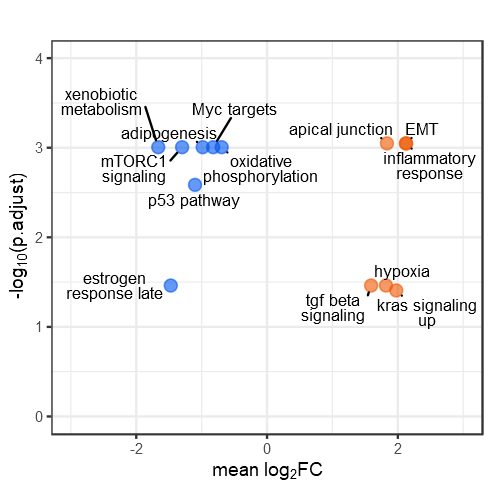

In [77]:
df_gsea <- as.data.frame(gsea_h_gene_sets)
idx <- order(df_gsea$p.adjust)
df_gsea <- df_gsea[idx, ]

# deselection
f <- !grepl(paste0(c("TNFA", "UV", "COAGULATION", "MYOGENESIS", "BILE_ACID_METABOLISM", 
    "MITOTIC_SPINDLE", "ALLOGRAFT_REJECTION", "FATTY_ACID_METABOLISM", "CHOLESTEROL_HOMEOSTASIS", 
    "COMPLEMENT", "IL2_STAT5_SIGNALING", "IL6_JAK_STAT3_SIGNALING", "HEME_METABOLISM", 
    "PEROXISOME"), collapse = "|"), df_gsea$Description)
df_gsea <- df_gsea[f, ]

df_gsea$meanlog2fc <- sapply(df_gsea$core_enrichment, function(x) {
    syms <- strsplit(x, "/")[[1]]
    return(mean(df_all[syms, "log2FCuntVStgfb.translation"], na.rm = T))
})

point_alpha = 0.6
point_size = 3
xlab = expression("mean log"[2] * "FC")
ylab = expression("-log"[10] * "(p.adjust)")
title = ""
xlim = c(-3, 3)
ylim = c(0, 4)
df_gsea$sig <- "no"
f_up <- df_gsea$p.adjust < 0.05 & df_gsea$meanlog2fc > 0.025
f_dn <- df_gsea$p.adjust < 0.05 & df_gsea$meanlog2fc < -0.025
df_gsea$sig[f_up] <- "up"
df_gsea$sig[f_dn] <- "dn"
head(df_gsea[f_up, , drop = F], 100)
head(df_gsea[f_dn, , drop = F], 100)

gg <- ggplot(data = df_gsea, aes(x = meanlog2fc, y = -log10(p.adjust), colour = sig)) + 
    geom_point(alpha = point_alpha, size = point_size) + theme_bw() + ggtitle(title) + 
    theme(legend.position = "none") + xlim(xlim) + ylim(ylim) + xlab(xlab) + ylab(ylab) + 
    scale_colour_manual(values = c(no = "black", up = "#ee5500", dn = "#0055ee"))

require("ggrepel")
df_gsea$nudge_x <- 0.05
df_gsea$nudge_x[f_dn] <- -0.05
df_gsea$nudge_y <- 0
f <- grepl("MTORC1_SIGNALING", df_gsea$Description)
df_gsea[f, "nudge_x"] <- -0.2
df_gsea[f, "nudge_y"] <- -0.2

# change name
df_gsea$Description <- tolower(df_gsea$Description)
df_gsea$Description <- mgsub::mgsub(df_gsea$Description, tolower(c("HALLMARK", "KEGG", "EPITHELIAL_MESENCHYMAL_TRANSITION", 
    "HALLMARK_MYC_TARGETS_V1", "MTORC1_SIGNALING", "_")), c("", "", "EMT", "Myc targets", 
    "mTORC1 signaling", " "))
df_gsea$Description <- str_wrap(df_gsea$Description, width = 15)

f <- df_gsea$sig != "no"
if (any(f)) {
    df1 <- df_gsea[f, , drop = F]
    gg <- gg + geom_text_repel(data = df1, aes(label = Description, lineheight = 0.75), 
        size = 3.5, colour = "black", force = 1, box.padding = 0.25, point.padding = 0.5, 
        min.segment.length = unit(0, "lines"), nudge_x = df1$nudge_x, nudge_y = df1$nudge_y, 
        seed = seed_geom_text_repel)
}

print_figure(gg, width = 4.1, height = 4.1, file = sprintf("volcano_plot.%s.gsea", condstr))

#### gseaplot

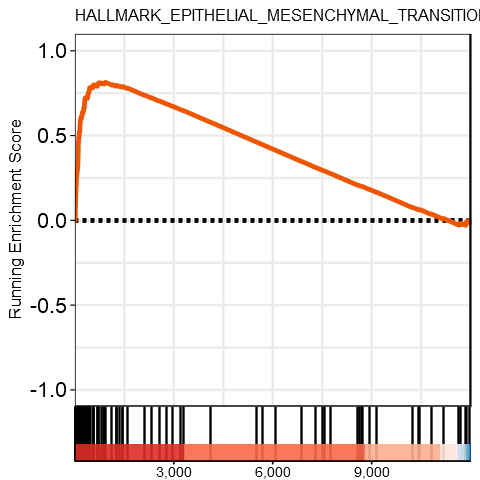

In [78]:
title <- "HALLMARK_EPITHELIAL_MESENCHYMAL_TRANSITION"
#title <- "HALLMARK_MTORC1_SIGNALING"
gg <- gseaplot3(gsea_h_gene_sets, geneSetID = title, title = title, color = "#ee5500", 
    base_size = 8, rel_heights = c(1.5, 0.25, 1), subplots = 1:2, pvalue_table = FALSE, 
    ES_geom = "line")

print_figure(gg, width = 4, height = 4, f_display2screen = TRUE, file = sprintf("gseaplot.%s.%s%s", 
    condstr, tolower(title), type_gmt))

In [79]:
f <- !grepl(paste0(c("TNFA", "UV", "COAGULATION", "MYOGENESIS", "BILE_ACID_METABOLISM", 
    "MITOTIC_SPINDLE", "ALLOGRAFT_REJECTION", "FATTY_ACID_METABOLISM", "CHOLESTEROL_HOMEOSTASIS", 
    "COMPLEMENT", "IL2_STAT5_SIGNALING", "IL6_JAK_STAT3_SIGNALING", "HEME_METABOLISM", 
    "PEROXISOME"), collapse = "|"), gsea_h_gene_sets$ID)
IDs <- gsea_h_gene_sets$ID[f]

for (ID in IDs) {
  verb('%s\n', ID)  
  title <- ID  
  gg <- gseaplot3(gsea_h_gene_sets, geneSetID = ID, title = title,
    color = "black", base_size = 8,
    rel_heights = c(1.5, 0.25, 1), subplots = 1:2, pvalue_table = FALSE,
    ES_geom = "line")

  print_figure(gg, width=4, height=4, f_display2screen=FALSE,
    file=sprintf("gseaplot.%s.%s", condstr, tolower(title)))
}

HALLMARK_APICAL_JUNCTION
HALLMARK_EPITHELIAL_MESENCHYMAL_TRANSITION
HALLMARK_INFLAMMATORY_RESPONSE
HALLMARK_XENOBIOTIC_METABOLISM
HALLMARK_ADIPOGENESIS
HALLMARK_OXIDATIVE_PHOSPHORYLATION
HALLMARK_MTORC1_SIGNALING
HALLMARK_MYC_TARGETS_V1
HALLMARK_P53_PATHWAY
HALLMARK_HYPOXIA
HALLMARK_ESTROGEN_RESPONSE_LATE
HALLMARK_TGF_BETA_SIGNALING
HALLMARK_KRAS_SIGNALING_UP


# riboseq.tgfb48.cx5461

In [80]:
condstr <- 'riboseq.tgfb.cx5461'

In [81]:
sym_up <- sym_ribo2_up
if (f_remove_pseudogene) sym_up <- setdiff(sym_up, pseudogenes)
n_up <- length(sym_up)
n_up

sym_dn <- sym_ribo2_dn
if (f_remove_pseudogene) sym_dn <- setdiff(sym_dn, pseudogenes)
n_dn <- length(sym_dn)
n_dn

sym_up_dn <- union(sym_up, sym_dn)
n_up_dn <- length(sym_up_dn)
n_up_dn

[1] 680

[1] 602

[1] 1282

## all genes

### GSEA

In [82]:
library(clusterProfiler)
library(DOSE)
library(msigdbr)
library(enrichplot)

nv <- sign(df_all$log2FCtgfbVStgfbCX5461.translation)*(-log10(df_all$PtgfbVStgfbCX5461.translation))
names(nv) <- rownames(df_all);
f <- is.finite(nv); t <- min(nv[f]); nv[nv < t] <- t*1.1; t <- max(nv[f]); nv[nv > t] <- t*1.1

type_gmt <- ''
#fname_gmt <- sprintf("./data/msigdb_gmt_mouse%s/h.all.v6.1.symbols_mouse%s.gmt", type_gmt, type_gmt)
#gmt_h <- read.gmt(fname_gmt)

set.seed(seed_gsea)
#gsea_all <- GSEA(sort(nv[!is.na(nv)], decreasing=T), exponent =1,
#                nPerm = 10000, minGSSize = 10, maxGSSize = 500,   
#                pvalueCutoff = 0.05, pAdjustMethod = "BH", 
#                TERM2GENE=gmt_h, TERM2NAME=NA, seed=FALSE, by="fgsea")
#gsea_all <- setReadable(gsea_all, OrgDb=org.Mm.eg.db, keyType="ENTREZID")


gmt_mus <- msigdbr(species = "mouse", category = "C2", subcategory = "CP:KEGG") %>% 
  dplyr::select(gs_name, gene_symbol)

### 50 Hallmark pathway analysis; http://www.gsea-msigdb.org/gsea/msigdb/collection_details.jsp#H
h_gene_sets = msigdbr(species = "mouse", category = "H") %>%
  dplyr::select(gs_name, gene_symbol)

set.seed(seed_gsea)
gsea_all <- GSEA(sort(nv[!is.na(nv)], decreasing=T), exponent =1,
                 nPerm = 10000, minGSSize = 5, maxGSSize = 500,   
                 pvalueCutoff = 0.05, pAdjustMethod = "BH", 
                 TERM2GENE=gmt_mus, TERM2NAME=NA, seed=FALSE, by="fgsea")

head(gsea_all); dim(gsea_all)

gsea_h_gene_sets <- GSEA(sort(nv[!is.na(nv)], decreasing=T), exponent =1,
                         nPerm = 10000, minGSSize = 5, maxGSSize = 500,   
                         pvalueCutoff = 0.05, pAdjustMethod = "BH", 
                         TERM2GENE=h_gene_sets, TERM2NAME=NA, seed=FALSE, by="fgsea")

head(gsea_h_gene_sets); dim(gsea_h_gene_sets)

gsea_h_gene_sets@result %>% 
  dplyr::select(enrichmentScore,  NES, p.adjust) %>% 
  arrange(desc(enrichmentScore)) %>% 
  write.csv(., file = sprintf('table/%s.all.gsea.h%s.csv', condstr, type_gmt))



write.table(gsea_all, file = sprintf('table/%s.all.gsea.h%s.txt', condstr, type_gmt),
            row.names = TRUE , col.names = NA ,  sep="\t"  , quote = FALSE  )








preparing geneSet collections...

GSEA analysis...

Warning message in .GSEA(geneList = geneList, exponent = exponent, minGSSize = minGSSize, :
"We do not recommend using nPerm parameter incurrent and future releases"
Warning message in fgsea(pathways = geneSets, stats = geneList, nperm = nPerm, minSize = minGSSize, :
"You are trying to run fgseaSimple. It is recommended to use fgseaMultilevel. To run fgseaMultilevel, you need to remove the nperm argument in the fgsea function call."
Warning message in preparePathwaysAndStats(pathways, stats, minSize, maxSize, gseaParam, :
"There are ties in the preranked stats (0.74% of the list).
The order of those tied genes will be arbitrary, which may produce unexpected results."
leading edge analysis...

done...



,ID,Description,setSize,enrichmentScore,NES,pvalue,p.adjust,qvalues,rank,leading_edge,core_enrichment
,<chr>,<chr>,<int>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<chr>,<chr>
KEGG_RIBOSOME,KEGG_RIBOSOME,KEGG_RIBOSOME,82,0.8564058,2.761612,0.0001913876,0.009597031,0.008148686,760,"tags=61%, list=6%, signal=58%",Rpl23/Rplp0/Rps17/Rps4x/Rps9/Rpl13a/Rps11/Rps24/Rpl32/Rplp2/Rps3/Rpl8/Rps15a/Rps26/Rpl26/Rpl37a/Rpl11/Rpl22/Rpl18/Rps15/Rpl31/Fau/Rpl7/Mrpl13/Rps27/Rps3a1/Rpl3/Rps12/Rpl30/Rpl22l1/Rpl38/Rpl23a/Rpl4/Rps5/Rps23/Rpl36/Rpl28/Rps10/Rps21/Rps19/Rps27a/Rps29/Rps6/Rpsa/Rpl19/Rps27l/Rps7/Rps16/Rpl37/Rpl15
KEGG_ARRHYTHMOGENIC_RIGHT_VENTRICULAR_CARDIOMYOPATHY_ARVC,KEGG_ARRHYTHMOGENIC_RIGHT_VENTRICULAR_CARDIOMYOPATHY_ARVC,KEGG_ARRHYTHMOGENIC_RIGHT_VENTRICULAR_CARDIOMYOPATHY_ARVC,34,-0.8027495,-2.237751,0.0002054654,0.009597031,0.008148686,1466,"tags=59%, list=12%, signal=52%",Itga3/Cacnb2/Itgav/Actn4/Itgb5/Itga2/Cacna2d1/Cdh2/Pkp2/Lmna/Ctnna1/Dsp/Itga5/Actg1/Ctnnb1/Itgb3/Jup/Itgb6/Actn1/Actb
KEGG_ECM_RECEPTOR_INTERACTION,KEGG_ECM_RECEPTOR_INTERACTION,KEGG_ECM_RECEPTOR_INTERACTION,38,-0.7960448,-2.257851,0.0002070393,0.009597031,0.008148686,243,"tags=47%, list=2%, signal=47%",Itga2/Lamb2/Col1a1/Lamc1/Lamb3/Itga5/Col5a1/Itgb3/Lama5/Itgb6/Sdc1/Agrn/Fn1/Hspg2/Col4a2/Col4a1/Spp1/Thbs1
KEGG_FOCAL_ADHESION,KEGG_FOCAL_ADHESION,KEGG_FOCAL_ADHESION,126,-0.6303771,-2.203210,0.0002120891,0.009597031,0.008148686,974,"tags=24%, list=8%, signal=22%",Col6a1/Itgb5/Vasp/Tln2/Pdgfa/Pak4/Egfr/Itga2/Pdgfb/Flna/Lamb2/Vcl/Col1a1/Lamc1/Lamb3/Itga5/Col5a1/Actg1/Ctnnb1/Itgb3/Lama5/Itgb6/Actn1/Tln1/Fn1/Col4a2/Actb/Col4a1/Spp1/Thbs1
KEGG_DILATED_CARDIOMYOPATHY,KEGG_DILATED_CARDIOMYOPATHY,KEGG_DILATED_CARDIOMYOPATHY,35,-0.6788786,-1.900049,0.0004122861,0.014924758,0.012672374,1707,"tags=40%, list=14%, signal=34%",Cacnb3/Itga3/Cacnb2/Itgav/Itgb5/Adcy6/Itga2/Cacna2d1/Lmna/Itga5/Actg1/Itgb3/Itgb6/Actb
KEGG_LEUKOCYTE_TRANSENDOTHELIAL_MIGRATION,KEGG_LEUKOCYTE_TRANSENDOTHELIAL_MIGRATION,KEGG_LEUKOCYTE_TRANSENDOTHELIAL_MIGRATION,56,-0.5912441,-1.814861,0.0006235710,0.018811058,0.015972169,912,"tags=21%, list=8%, signal=20%",Vcam1/Vasp/Mmp9/Cldn4/Ctnna1/Vcl/Actg1/Ctnnb1/Actn1/Msn/Cldn2/Actb


[1] 12 11

preparing geneSet collections...

GSEA analysis...

Warning message in .GSEA(geneList = geneList, exponent = exponent, minGSSize = minGSSize, :
"We do not recommend using nPerm parameter incurrent and future releases"
Warning message in fgsea(pathways = geneSets, stats = geneList, nperm = nPerm, minSize = minGSSize, :
"You are trying to run fgseaSimple. It is recommended to use fgseaMultilevel. To run fgseaMultilevel, you need to remove the nperm argument in the fgsea function call."
Warning message in preparePathwaysAndStats(pathways, stats, minSize, maxSize, gseaParam, :
"There are ties in the preranked stats (0.74% of the list).
The order of those tied genes will be arbitrary, which may produce unexpected results."
leading edge analysis...

done...



,ID,Description,setSize,enrichmentScore,NES,pvalue,p.adjust,qvalues,rank,leading_edge,core_enrichment
,<chr>,<chr>,<int>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<chr>,<chr>
HALLMARK_OXIDATIVE_PHOSPHORYLATION,HALLMARK_OXIDATIVE_PHOSPHORYLATION,HALLMARK_OXIDATIVE_PHOSPHORYLATION,193,0.4690798,1.698540,0.0001842299,0.001342642,0.0007914523,1490,"tags=33%, list=12%, signal=29%",Uqcrb/Cox7a2l/Ndufa8/Cox4i1/Cox5b/Bax/Cox5a/Hspa9/Ndufb1/Cox7a2/Cox7b/Ndufv2/Afg3l2/Gpx4/Ndufb8/Ndufs3/Ndufa6/Cyb5r3/Cox8a/Atp6v1d/Atp5h/Hsd17b10/Sdhd/Uqcrq/Ndufa7/Atp5k/Uqcr10/Cox6a1/Ndufa5/Ndufb2/Atp5c1/Atp6v1f/Idh2/Decr1/Idh3b/Ndufa2/Dld/Hadhb/Atp6v0c/Sdhc/Cox6c/Atp6v1c1/Mrpl35/Ndufb6/Grpel1/Rhot2/Ndufb5/Vdac3/Oxa1l/Prdx3/Echs1/Ndufa4/Ndufa3/Ndufb7/Eci1/Acaa2/Atp5pb/Atp6v1g1/Ndufs2/Ndufs6/Ndufs8/Ech1/Timm17a
HALLMARK_P53_PATHWAY,HALLMARK_P53_PATHWAY,HALLMARK_P53_PATHWAY,165,0.5071042,1.799523,0.0001842978,0.001342642,0.0007914523,1486,"tags=25%, list=12%, signal=23%",Atf3/Mdm2/Tsc22d1/Cdkn1a/Btg2/Ctsd/Gadd45a/Rpl18/Ddit3/Txnip/Rps12/Ninj1/Ier5/Epha2/Rpl36/Ier3/Ccng1/Bax/Traf4/Rchy1/Dcxr/Fam162a/Zfp36l1/Ak1/Pmm1/Lif/Hint1/Rps27l/Stom/Ifi30/Plk3/Aen/S100a10/Hmox1/Rb1/Perp/Tax1bp3/Klf4/Fuca1/Fas/H1f2/Ankra2
HALLMARK_TNFA_SIGNALING_VIA_NFKB,HALLMARK_TNFA_SIGNALING_VIA_NFKB,HALLMARK_TNFA_SIGNALING_VIA_NFKB,150,0.5535519,1.936573,0.0001851852,0.001342642,0.0007914523,670,"tags=27%, list=6%, signal=26%",Atf3/Ccl2/Ccnl1/Clcf1/Fosl1/Cebpb/Hes1/Id2/Tsc22d1/Cdkn1a/Egr1/Zfp36/Btg2/Tiparp/Gadd45a/Phlda1/Fosb/Csf2/Sdc4/Sqstm1/Gadd45b/Dusp5/Pfkfb3/Ninj1/Ier5/Areg/Ier3/Tgif1/Klf6/Litaf/Bcl3/Pnrc1/Nfil3/Klf10/Nfe2l2/Junb/Lif/Bhlhe40/Plaur/Maff/Map2k3
HALLMARK_MYC_TARGETS_V1,HALLMARK_MYC_TARGETS_V1,HALLMARK_MYC_TARGETS_V1,201,0.4465904,1.623890,0.0001858391,0.001342642,0.0007914523,1582,"tags=27%, list=13%, signal=24%",Eif4a1/Rplp0/Ifrd1/Psmd8/Rps3/Npm1/Rpl22/Rpl18/Ywhae/Psma7/Rps5/Snrpd1/Mrps18b/Cox5a/Rps10/Erh/Rps6/Snrpa1/Srsf3/Snrpb2/Nme1/Mrpl9/U2af1/Psmb2/Snrpg/Odc1/Vbp1/Psmb3/C1qbp/Psmc6/Psma2/Hdgf/Ssb/Eif3j2/Vdac3/Prdx3/Pa2g4/Bub3/H2az1/Rpl34/Hnrnpa3/Impdh2/Eif2s2/Ran/Prdx4/Ywhaq/Hddc2/Srsf7/Rpl14/Hnrnpa1/Hprt/Etf1/Ranbp1/Cops5
HALLMARK_COAGULATION,HALLMARK_COAGULATION,HALLMARK_COAGULATION,72,-0.6007331,-1.926032,0.0002105706,0.001342642,0.0007914523,921,"tags=26%, list=8%, signal=25%",Prep/Mmp9/Mmp14/Lgmn/Gnb2/Olr1/Itga2/Lrp1/Acox2/Pdgfb/Anxa1/Sparc/Dusp6/Itgb3/Fn1/Clu/F3/Serpine1/Thbs1
HALLMARK_APICAL_JUNCTION,HALLMARK_APICAL_JUNCTION,HALLMARK_APICAL_JUNCTION,112,-0.5367668,-1.836572,0.0002134927,0.001342642,0.0007914523,2390,"tags=38%, list=20%, signal=30%",Insig1/Nectin2/Baiap2/Wnk4/Atp1a3/Pkd1/Col16a1/Zyx/Mpzl2/Pfn1/Gnai2/Taok2/Skap2/Shroom2/Myl12b/Pcdh1/Tubg1/Sympk/Itga3/Exoc4/Mvd/Nf2/Actn4/Vcam1/Vasp/Mmp9/Actg2/Cldn4/Cdh6/Egfr/Acta1/Itga2/Ctnna1/Vcl/Cdh1/Lamb3/Actg1/Jup/Actn1/Msn/Actb/Myh9


[1] 19 11

#### volcano plot

,ID,Description,setSize,enrichmentScore,NES,pvalue,p.adjust,qvalues,rank,leading_edge,core_enrichment,meanlog2fc,sig
,<chr>,<chr>,<int>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<chr>,<chr>,<dbl>,<chr>
HALLMARK_OXIDATIVE_PHOSPHORYLATION,HALLMARK_OXIDATIVE_PHOSPHORYLATION,HALLMARK_OXIDATIVE_PHOSPHORYLATION,193,0.4690798,1.698540,0.0001842299,0.001342642,0.0007914523,1490,"tags=33%, list=12%, signal=29%",Uqcrb/Cox7a2l/Ndufa8/Cox4i1/Cox5b/Bax/Cox5a/Hspa9/Ndufb1/Cox7a2/Cox7b/Ndufv2/Afg3l2/Gpx4/Ndufb8/Ndufs3/Ndufa6/Cyb5r3/Cox8a/Atp6v1d/Atp5h/Hsd17b10/Sdhd/Uqcrq/Ndufa7/Atp5k/Uqcr10/Cox6a1/Ndufa5/Ndufb2/Atp5c1/Atp6v1f/Idh2/Decr1/Idh3b/Ndufa2/Dld/Hadhb/Atp6v0c/Sdhc/Cox6c/Atp6v1c1/Mrpl35/Ndufb6/Grpel1/Rhot2/Ndufb5/Vdac3/Oxa1l/Prdx3/Echs1/Ndufa4/Ndufa3/Ndufb7/Eci1/Acaa2/Atp5pb/Atp6v1g1/Ndufs2/Ndufs6/Ndufs8/Ech1/Timm17a,0.6541553,up
HALLMARK_P53_PATHWAY,HALLMARK_P53_PATHWAY,HALLMARK_P53_PATHWAY,165,0.5071042,1.799523,0.0001842978,0.001342642,0.0007914523,1486,"tags=25%, list=12%, signal=23%",Atf3/Mdm2/Tsc22d1/Cdkn1a/Btg2/Ctsd/Gadd45a/Rpl18/Ddit3/Txnip/Rps12/Ninj1/Ier5/Epha2/Rpl36/Ier3/Ccng1/Bax/Traf4/Rchy1/Dcxr/Fam162a/Zfp36l1/Ak1/Pmm1/Lif/Hint1/Rps27l/Stom/Ifi30/Plk3/Aen/S100a10/Hmox1/Rb1/Perp/Tax1bp3/Klf4/Fuca1/Fas/H1f2/Ankra2,0.8764439,up
HALLMARK_MYC_TARGETS_V1,HALLMARK_MYC_TARGETS_V1,HALLMARK_MYC_TARGETS_V1,201,0.4465904,1.623890,0.0001858391,0.001342642,0.0007914523,1582,"tags=27%, list=13%, signal=24%",Eif4a1/Rplp0/Ifrd1/Psmd8/Rps3/Npm1/Rpl22/Rpl18/Ywhae/Psma7/Rps5/Snrpd1/Mrps18b/Cox5a/Rps10/Erh/Rps6/Snrpa1/Srsf3/Snrpb2/Nme1/Mrpl9/U2af1/Psmb2/Snrpg/Odc1/Vbp1/Psmb3/C1qbp/Psmc6/Psma2/Hdgf/Ssb/Eif3j2/Vdac3/Prdx3/Pa2g4/Bub3/H2az1/Rpl34/Hnrnpa3/Impdh2/Eif2s2/Ran/Prdx4/Ywhaq/Hddc2/Srsf7/Rpl14/Hnrnpa1/Hprt/Etf1/Ranbp1/Cops5,0.6568390,up
HALLMARK_DNA_REPAIR,HALLMARK_DNA_REPAIR,HALLMARK_DNA_REPAIR,140,0.4452319,1.542961,0.0020549225,0.011416236,0.0067295707,1761,"tags=28%, list=15%, signal=24%",Vps37b/Alyref/Bcap31/Gpx4/Tsg101/Nt5c3/Edf1/Aprt/Ak1/Rala/Taf10/Gtf2b/Polr2j/Polr2k/Dad1/Tmed2/Nme1/Guk1/Stx3/Nt5c/Sdcbp/Zwint/Nme4/Polr3c/Bola2/Polr2c/Polr1h/Impdh2/Mrpl40/Nudt9/Pole4/Supt4a/Dguok/Hprt/Prim1/Polr2g/Polr1c/Upf3b/Polr2d,0.9201477,up
HALLMARK_UNFOLDED_PROTEIN_RESPONSE,HALLMARK_UNFOLDED_PROTEIN_RESPONSE,HALLMARK_UNFOLDED_PROTEIN_RESPONSE,109,0.4415803,1.478089,0.0080554515,0.026851505,0.0158282555,1020,"tags=20%, list=9%, signal=19%",Atf3/Ccl2/Eif4a1/Cebpb/Npm1/Gosr2/Hspa9/Exosc1/Ywhaz/Rps14/Eif4ebp1/Stc2/Cks1b/Cebpg/Paip1/Spcs1/Dnajb9/Nabp1/Ero1a/Mthfd2/Exosc9/Atp6v0d1,0.9383437,up
HALLMARK_APOPTOSIS,HALLMARK_APOPTOSIS,HALLMARK_APOPTOSIS,116,0.4295760,1.449683,0.0097250795,0.030390873,0.0179146201,1176,"tags=21%, list=10%, signal=19%",Atf3/Krt18/Tnfrsf12a/Cdkn1a/Btg2/Gadd45a/Ddit3/Txnip/Sqstm1/Gadd45b/Ier3/Bax/Bcap31/Gpx4/Dnaja1/Bcl2l1/Timp1/Casp6/Rhot2/Pea15a/Hmox1/Dap3/Ppp2r5b/Ccnd1,0.7545376,up


,ID,Description,setSize,enrichmentScore,NES,pvalue,p.adjust,qvalues,rank,leading_edge,core_enrichment,meanlog2fc,sig
,<chr>,<chr>,<int>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<chr>,<chr>,<dbl>,<chr>
HALLMARK_APICAL_JUNCTION,HALLMARK_APICAL_JUNCTION,HALLMARK_APICAL_JUNCTION,112,-0.5367668,-1.836572,0.0002134927,0.001342642,0.0007914523,2390,"tags=38%, list=20%, signal=30%",Insig1/Nectin2/Baiap2/Wnk4/Atp1a3/Pkd1/Col16a1/Zyx/Mpzl2/Pfn1/Gnai2/Taok2/Skap2/Shroom2/Myl12b/Pcdh1/Tubg1/Sympk/Itga3/Exoc4/Mvd/Nf2/Actn4/Vcam1/Vasp/Mmp9/Actg2/Cldn4/Cdh6/Egfr/Acta1/Itga2/Ctnna1/Vcl/Cdh1/Lamb3/Actg1/Jup/Actn1/Msn/Actb/Myh9,-0.8653272,dn
HALLMARK_EPITHELIAL_MESENCHYMAL_TRANSITION,HALLMARK_EPITHELIAL_MESENCHYMAL_TRANSITION,HALLMARK_EPITHELIAL_MESENCHYMAL_TRANSITION,108,-0.6466975,-2.198929,0.0002141786,0.001342642,0.0007914523,984,"tags=44%, list=8%, signal=40%",Cald1/Acta2/Vcam1/Itgb5/Mmp14/Bdnf/Copa/Dst/Pmp22/Adam12/Col12a1/Cdh6/Itga2/Qsox1/Lrp1/Efemp2/Tagln/Igfbp3/Cdh2/Nt5e/Flna/Col1a1/Loxl2/Lamc1/Col7a1/Itga5/Notch2/Sparc/Col5a1/Itgb3/Inhba/Colgalt1/Tnfaip3/Plod2/Sdc1/Vim/Fn1/Tgm2/Col4a2/Ccn1/Ccn2/Col4a1/Fbln2/Rhob/Serpine1/Spp1/Thbs1,-1.0217917,dn
HALLMARK_HYPOXIA,HALLMARK_HYPOXIA,HALLMARK_HYPOXIA,148,-0.4384321,-1.558366,0.0026024723,0.013012362,0.0076704448,716,"tags=23%, list=6%, signal=22%",Hdlbp/Tpbg/Pklr/Ilvbl/Ampd3/Hk1/Aldoc/Egfr/Map3k1/Tes/Eno3/Irs2/Angptl4/Igfbp3/Ddit4/Pdgfb/Ets1/Akap12/Hspa5/Col5a1/Cavin1/Aldoa/Hk2/Cp/Tnfaip3/Plin2/Fos/Tgm2/Ccn1/Ccn2/F3/Myh9/Serpine1/Slc6a6,-1.1177675,dn
HALLMARK_ANGIOGENESIS,HALLMARK_ANGIOGENESIS,HALLMARK_ANGIOGENESIS,18,-0.7227776,-1.746260,0.0034828928,0.013395742,0.0078964372,1624,"tags=50%, list=14%, signal=43%",Jag2/S100a4/Itgav/Pdgfa/Olr1/Slco2a1/App/Jag1/Spp1,-1.2119334,dn
HALLMARK_GLYCOLYSIS,HALLMARK_GLYCOLYSIS,HALLMARK_GLYCOLYSIS,149,-0.4026410,-1.432351,0.0110990207,0.032644178,0.0192428841,1428,"tags=21%, list=12%, signal=19%",B3gnt3/Ankzf1/Gmppa/Galk2/Gale/Aldh9a1/Cyb5a/Gfpt1/Nasp/Hdlbp/Tpbg/Xylt2/Me1/Egfr/Qsox1/Pkm/Irs2/Angptl4/Igfbp3/Gmppb/Pkp2/Ddit4/Pygb/Nt5e/Hspa5/Col5a1/Fkbp4/Aldoa/Hk2/Plod2/Sdc1/Agrn,-0.9159850,dn


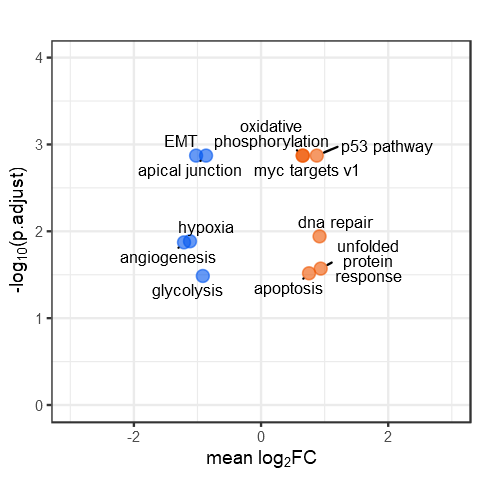

In [83]:
df_gsea <- as.data.frame(gsea_h_gene_sets)
idx <- order(df_gsea$p.adjust)
df_gsea <- df_gsea[idx,]

# deselection
f <- !grepl(paste0(c('TNFA','UV', 'COAGULATION','MYOGENESIS',
                    'BILE_ACID_METABOLISM', 
                    'MITOTIC_SPINDLE','ALLOGRAFT_REJECTION', 
                    'FATTY_ACID_METABOLISM','CHOLESTEROL_HOMEOSTASIS', 
                    'COMPLEMENT','IL2_STAT5_SIGNALING','IL6_JAK_STAT3_SIGNALING',
                    'HEME_METABOLISM','PEROXISOME'), collapse='|'),
        df_gsea$Description)
df_gsea <- df_gsea[f,]

df_gsea$meanlog2fc <- sapply(df_gsea$core_enrichment, function(x) {
    syms <- strsplit(x,'/')[[1]]
    return (mean(df_all[syms,'log2FCtgfbVStgfbCX5461.translation'], na.rm = T)) })

point_alpha=0.6; point_size=3
xlab=expression('mean log'[2]*'FC'); ylab=expression('-log'[10]*'(p.adjust)'); title="";
xlim=c(-3,3); ylim=c(0,4)
df_gsea$sig <- 'no'; 
f_up <- df_gsea$p.adjust < 0.05 & df_gsea$meanlog2fc > 0.025
f_dn <- df_gsea$p.adjust < 0.05 & df_gsea$meanlog2fc < -0.025
df_gsea$sig[f_up] <- 'up';
df_gsea$sig[f_dn] <- 'dn';
head(df_gsea[f_up,,drop=F],100)
head(df_gsea[f_dn,,drop=F],100)

gg <- ggplot(data=df_gsea,
    aes(x=meanlog2fc, y=-log10(p.adjust), colour=sig)) +
    geom_point(alpha=point_alpha, size=point_size) +
    theme_bw() + ggtitle(title) +
    theme(legend.position = "none") +
    xlim(xlim) + ylim(ylim) +
    xlab(xlab) + ylab(ylab) +
    scale_colour_manual(values = c('no'='black','up'='#ee5500', 'dn'='#0055ee'))

require('ggrepel')
df_gsea$nudge_x <- 0.05
df_gsea$nudge_x[f_dn] <- -0.05 
df_gsea$nudge_y <- 0
f <- grepl("ANGIOGENESIS|APOPTOSIS", df_gsea$Description)
df_gsea[f, 'nudge_x'] <- -0.2
df_gsea[f, 'nudge_y'] <- -0.1

# change name
df_gsea$Description <- tolower(df_gsea$Description)
df_gsea$Description <- mgsub::mgsub(df_gsea$Description,
        tolower(c('HALLMARK','KEGG','EPITHELIAL_MESENCHYMAL_TRANSITION','_')),
        c('','','EMT',' '))
df_gsea$Description <- str_wrap(df_gsea$Description, width=15)

f <- df_gsea$sig != 'no'
if (any(f)) {
  df1 <- df_gsea[f,,drop=F]          
  gg <- gg + geom_text_repel(data=df1,
           aes(label=Description, lineheight=.75),
           size=3.5, colour='black',
           force=1, box.padding=0.25, point.padding=0.5,
           min.segment.length = unit(0, 'lines'),          
           nudge_x=df1$nudge_x, nudge_y=df1$nudge_y,
           seed=seed_geom_text_repel)
}
                       
print_figure(gg, width=4, height=4,
    file=sprintf("volcano_plot.%s.gsea", condstr))

#### gseaplot

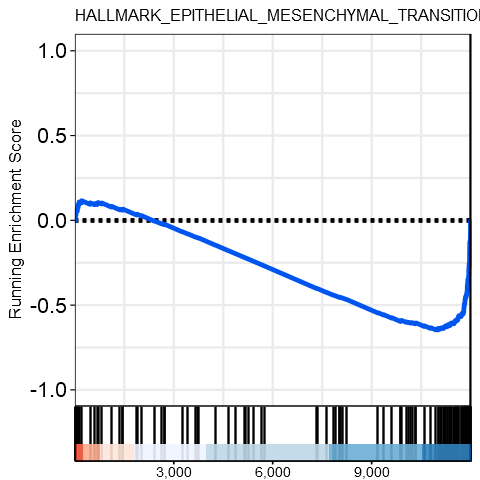

In [84]:
title <- "HALLMARK_EPITHELIAL_MESENCHYMAL_TRANSITION"
#title <- "HALLMARK_MTORC1_SIGNALING"
gg <- gseaplot3(gsea_h_gene_sets, geneSetID = title, title = title, color = "#0055ee", 
    base_size = 8, rel_heights = c(1.5, 0.25, 1), subplots = 1:2, pvalue_table = FALSE, 
    ES_geom = "line")

print_figure(gg, width = 4, height = 4, f_display2screen = TRUE, file = sprintf("gseaplot.%s.%s%s", 
    condstr, tolower(title), type_gmt))

In [85]:
f <- !grepl(paste0(c("TNFA", "UV", "COAGULATION", "MYOGENESIS", "BILE_ACID_METABOLISM", 
    "MITOTIC_SPINDLE", "ALLOGRAFT_REJECTION", "FATTY_ACID_METABOLISM", "CHOLESTEROL_HOMEOSTASIS", 
    "COMPLEMENT", "IL2_STAT5_SIGNALING", "IL6_JAK_STAT3_SIGNALING", "HEME_METABOLISM", 
    "PEROXISOME"), collapse = "|"), gsea_h_gene_sets$ID)
IDs <- gsea_h_gene_sets$ID[f]

for (ID in IDs) {
  verb('%s\n', ID)  
  title <- ID  
  gg <- gseaplot3(gsea_h_gene_sets, geneSetID = ID, title = title,
    color = "black", base_size = 8,
    rel_heights = c(1.5, 0.25, 1), subplots = 1:2, pvalue_table = FALSE,
    ES_geom = "line")

  print_figure(gg, width=4, height=4, f_display2screen=FALSE,
    file=sprintf("gseaplot.%s.%s", condstr, tolower(title)))
}

HALLMARK_OXIDATIVE_PHOSPHORYLATION
HALLMARK_P53_PATHWAY
HALLMARK_MYC_TARGETS_V1
HALLMARK_APICAL_JUNCTION
HALLMARK_EPITHELIAL_MESENCHYMAL_TRANSITION
HALLMARK_DNA_REPAIR
HALLMARK_HYPOXIA
HALLMARK_ANGIOGENESIS
HALLMARK_UNFOLDED_PROTEIN_RESPONSE
HALLMARK_APOPTOSIS
HALLMARK_GLYCOLYSIS


# Transcription.unt.tgfb48

In [132]:
condstr <- 'Transcription.cnt.tgfb'

In [133]:
### GSEA analysis for Control Vs TGFB trnascription
library(clusterProfiler)
library(DOSE)
library(msigdbr)
library(enrichplot)
colnames(df_all)
nv <- sign(df_all$log2FCuntVStgfb.transcription)*(-log10(df_all$PuntVStgfb.transcription))
names(nv) <- rownames(df_all);
f <- is.finite(nv); t <- min(nv[f]); nv[nv < t] <- t*1.1; t <- max(nv[f]); nv[nv > t] <- t*1.1



gmt_mus <- msigdbr(species = "mouse", category = "C2", subcategory = "CP:KEGG") %>% 
  dplyr::select(gs_name, gene_symbol)

### 50 Hallmark pathway analysis; http://www.gsea-msigdb.org/gsea/msigdb/collection_details.jsp#H
h_gene_sets = msigdbr(species = "mouse", category = "H") %>%
  dplyr::select(gs_name, gene_symbol)

set.seed(seed_gsea)
gsea_all <- GSEA(sort(nv[!is.na(nv)], decreasing=T), exponent =1,
                 nPerm = 10000, minGSSize = 5, maxGSSize = 500,   
                 pvalueCutoff = 0.05, pAdjustMethod = "BH", 
                 TERM2GENE=gmt_mus, TERM2NAME=NA, seed=FALSE, by="fgsea")

head(gsea_all); dim(gsea_all)

gsea_h_gene_sets <- GSEA(sort(nv[!is.na(nv)], decreasing=T), exponent =1,
                         nPerm = 10000, minGSSize = 5, maxGSSize = 500,   
                         pvalueCutoff = 0.05, pAdjustMethod = "BH", 
                         TERM2GENE=h_gene_sets, TERM2NAME=NA, seed=FALSE, by="fgsea")
head(gsea_h_gene_sets); dim(gsea_h_gene_sets)

gsea_h_gene_sets@result %>% 
  dplyr::select(enrichmentScore,  NES, p.adjust) %>% 
  arrange(desc(enrichmentScore)) %>% 
  write.csv(., file = sprintf('table/%s.all.gsea.transcription.h%s.csv', condstr, type_gmt))



type_gmt <- ''
#fname_gmt <- sprintf("./data/msigdb_gmt_mouse%s/h.all.v6.1.symbols_mouse%s.gmt", type_gmt, type_gmt)
#gmt_h <- read.gmt(fname_gmt)

#set.seed(seed_gsea)
#gsea_all <- GSEA(sort(nv[!is.na(nv)], decreasing=T), exponent =1,
#                nPerm = 10000, minGSSize = 10, maxGSSize = 500,   
#                pvalueCutoff = 0.05, pAdjustMethod = "BH", 
#                TERM2GENE=gmt_h, TERM2NAME=NA, seed=FALSE, by="fgsea")
#gsea_all <- setReadable(gsea_all, OrgDb=org.Mm.eg.db, keyType="ENTREZID")

#head(gsea_all)
#dim(gsea_all)

write.table(gsea_h_gene_sets, file = sprintf('table/%s.all.gsea.transcription.h%s.txt', condstr, type_gmt),
            row.names = TRUE , col.names = NA ,  sep="\t"  , quote = FALSE  )

[1] "seqnames"                            
 [2] "start"                               
 [3] "end"                                 
 [4] "width"                               
 [5] "strand"                              
 [6] "source"                              
 [7] "unt.transcription"                   
 [8] "tgfb.transcription"                  
 [9] "tgfbCX5461.transcription"            
[10] "log2FCuntVStgfb.transcription"       
[11] "FDRuntVStgfb.transcription"          
[12] "PuntVStgfb.transcription"            
[13] "log2FCtgfbVStgfbCX5461.transcription"
[14] "FDRtgfbVStgfbCX5461.transcription"   
[15] "PtgfbVStgfbCX5461.transcription"     
[16] "unt.tgfb.DEtranscription"            
[17] "tgfb.tgfbCX5461.DEtranscription"     
[18] "reversible.transcription"            
[19] "unt.translation"                     
[20] "tgfb.translation"                    
[21] "tgfbCX5461.translation"              
[22] "log2FCuntVStgfb.translation"         
[23] "FDRuntVStgfb.translation"            
[24] "PuntVStgfb.translation"              
[25] "log2FCtgfbVStgfbCX5461.translation"  
[26] "FDRtgfbVStgfbCX5461.translation"     
[27] "PtgfbVStgfbCX5461.translation"       
[28] "unt.tgfb.DEtranslation"              
[29] "tgfb.tgfbCX5461.DEtranslation"       
[30] "reversible.translation"              
[31] "biotype"

preparing geneSet collections...

GSEA analysis...

Warning message in .GSEA(geneList = geneList, exponent = exponent, minGSSize = minGSSize, :
"We do not recommend using nPerm parameter incurrent and future releases"
Warning message in fgsea(pathways = geneSets, stats = geneList, nperm = nPerm, minSize = minGSSize, :
"You are trying to run fgseaSimple. It is recommended to use fgseaMultilevel. To run fgseaMultilevel, you need to remove the nperm argument in the fgsea function call."
Warning message in preparePathwaysAndStats(pathways, stats, minSize, maxSize, gseaParam, :
"There are ties in the preranked stats (17.84% of the list).
The order of those tied genes will be arbitrary, which may produce unexpected results."
leading edge analysis...

done...



,ID,Description,setSize,enrichmentScore,NES,pvalue,p.adjust,qvalues,rank,leading_edge,core_enrichment
,<chr>,<chr>,<int>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<chr>,<chr>
KEGG_MAPK_SIGNALING_PATHWAY,KEGG_MAPK_SIGNALING_PATHWAY,KEGG_MAPK_SIGNALING_PATHWAY,176,0.4901777,1.787339,0.0001594134,0.00191016,0.001060586,2297,"tags=41%, list=18%, signal=34%",Bdnf/Cacna1g/Cacnb3/Dusp1/Dusp10/Dusp14/Dusp2/Dusp3/Dusp4/Dusp5/Dusp7/Dusp8/Flna/Flnb/Gadd45a/Gadd45b/Gadd45g/Gna12/Jun/Jund/Map3k14/Map3k20/Map4k4/Mapkapk2/Nfatc2/Nfkb2/Ngf/Pdgfa/Pdgfb/Pdgfrb/Ppp3ca/Rela/Srf/Stk4/Tgfb1/Cacna2d1/Rras/Il1r1/Pla2g4a/Prkx/Akt1/Mras/Myc/Hspa1b/Taok3/Crk/Tgfb2/Nlk/Map2k1/Map3k3/Elk1/Flnc/Nras/Fgfr1/Ikbkb/Rap1b/Mapk11/Gng12/Tgfbr1/Max/Nr4a1/Mapkapk3/Dusp16/Nfkb1/Rps6ka2/Pla2g12a/Map2k7/Elk4/Sos1/Grb2/Map2k3/Daxx
KEGG_FOCAL_ADHESION,KEGG_FOCAL_ADHESION,KEGG_FOCAL_ADHESION,141,0.5501316,1.954700,0.0001627869,0.00191016,0.001060586,1788,"tags=40%, list=14%, signal=35%",Actb/Actg1/Actn1/Actn4/Capn2/Col1a1/Col4a1/Col4a2/Col5a1/Flna/Flnb/Fn1/Igf1r/Ilk/Itga5/Itgav/Itgb1/Itgb3/Itgb5/Itgb6/Jun/Lamb1/Lamb3/Myl12a/Parvb/Pdgfa/Pdgfb/Pdgfc/Pdgfrb/Rapgef1/Spp1/Src/Thbs1/Tln1/Tln2/Vasp/Vcl/Vegfa/Zyx/Parva/Akt1/Col5a3/Crk/Col6a1/Vegfc/Map2k1/Elk1/Vwf/Flnc/Itga2/Pip5k1c/Rap1b/Flt4/Myl7/Arhgap35/Bcar1
KEGG_REGULATION_OF_ACTIN_CYTOSKELETON,KEGG_REGULATION_OF_ACTIN_CYTOSKELETON,KEGG_REGULATION_OF_ACTIN_CYTOSKELETON,144,0.5063775,1.802972,0.0001630523,0.00191016,0.001060586,2338,"tags=43%, list=18%, signal=36%",Actb/Actg1/Actn1/Actn4/Arpc1b/Arpc4/Baiap2/Cfl1/Enah/F2r/Fgd1/Fgd3/Fn1/Git1/Gna12/Gna13/Gsn/Iqgap1/Itga5/Itgav/Itgb1/Itgb3/Itgb5/Itgb6/Msn/Myh9/Myl12a/Pdgfa/Pdgfb/Pdgfc/Pdgfrb/Pip4k2a/Pip5k1a/Tmsb4x/Vcl/Rras/Ssh1/Arpc5/Mras/Crk/Slc9a1/Map2k1/Pip4k2b/Pip5k1b/Nras/Fgfr1/Itga2/Pip5k1c/Csk/Gng12/Myl7/Ssh3/Arhgap35/Bcar1/Arpc3/Pik3cb/Cyfip1/Tiam2/Sos1/Cfl2/Limk1/Pxn
KEGG_LYSOSOME,KEGG_LYSOSOME,KEGG_LYSOSOME,105,0.5724390,1.960271,0.0001692047,0.00191016,0.001060586,2567,"tags=49%, list=20%, signal=39%",Abca2/Atp6ap1/Atp6v0b/Atp6v0d1/Cd63/Cln5/Ctsb/Ctsd/Ctsl/Ctsw/Gba/Gla/Gns/Gusb/Lamp1/Lgmn/M6pr/Pla2g15/Psap/Tcirg1/Tpp1/Ap1s2/Lamp2/Laptm4a/Atp6v0c/Atp6v0a2/Nagpa/Arsa/Slc11a1/Ctse/Hgsnat/Sumf1/Glb1/Entpd4/Ctsa/Hexb/Npc2/Naglu/Acp2/Galc/Ctsf/Neu1/Arsb/Npc1/Fuca1/Atp6v0a1/Mcoln1/Scarb2/Hyal1/Ap3m2/Atp6v0a4
KEGG_CYTOKINE_CYTOKINE_RECEPTOR_INTERACTION,KEGG_CYTOKINE_CYTOKINE_RECEPTOR_INTERACTION,KEGG_CYTOKINE_CYTOKINE_RECEPTOR_INTERACTION,87,0.5391025,1.799215,0.0001715854,0.00191016,0.001060586,1729,"tags=39%, list=13%, signal=34%",Acvr1/Bmpr2/Ccl2/Clcf1/Csf1/Il11/Il17ra/Il18rap/Inhba/Lif/Pdgfa/Pdgfb/Pdgfc/Pdgfrb/Plekho2/Relt/Tgfb1/Tnfrsf12a/Tnfrsf1b/Vegfa/Il1r1/Il6ra/Ghr/Ifnar1/Il10rb/Ccl17/Tgfb2/Vegfc/Il6st/Cxcl16/Ccl7/Csf1r/Flt4/Tgfbr1
KEGG_FC_GAMMA_R_MEDIATED_PHAGOCYTOSIS,KEGG_FC_GAMMA_R_MEDIATED_PHAGOCYTOSIS,KEGG_FC_GAMMA_R_MEDIATED_PHAGOCYTOSIS,71,0.5801847,1.874293,0.0001732202,0.00191016,0.001060586,2004,"tags=42%, list=15%, signal=36%",Arpc1b/Arpc4/Asap1/Cfl1/Gab2/Gsn/Marcksl1/Myo10/Pip5k1a/Plcg1/Plcg2/Pld2/Sphk1/Vasp/Arpc5/Pla2g4a/Akt1/Crk/Dnm2/Map2k1/Plpp1/Pip4k2b/Pip5k1b/Hck/Pip5k1c/Lyn/Plpp3/Arpc3/Dnm1l/Pik3cb


[1] 69 11

preparing geneSet collections...

GSEA analysis...

Warning message in .GSEA(geneList = geneList, exponent = exponent, minGSSize = minGSSize, :
"We do not recommend using nPerm parameter incurrent and future releases"
Warning message in fgsea(pathways = geneSets, stats = geneList, nperm = nPerm, minSize = minGSSize, :
"You are trying to run fgseaSimple. It is recommended to use fgseaMultilevel. To run fgseaMultilevel, you need to remove the nperm argument in the fgsea function call."
Warning message in preparePathwaysAndStats(pathways, stats, minSize, maxSize, gseaParam, :
"There are ties in the preranked stats (17.84% of the list).
The order of those tied genes will be arbitrary, which may produce unexpected results."
leading edge analysis...

done...



,ID,Description,setSize,enrichmentScore,NES,pvalue,p.adjust,qvalues,rank,leading_edge,core_enrichment
,<chr>,<chr>,<int>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<chr>,<chr>
HALLMARK_TNFA_SIGNALING_VIA_NFKB,HALLMARK_TNFA_SIGNALING_VIA_NFKB,HALLMARK_TNFA_SIGNALING_VIA_NFKB,157,0.5398598,1.941602,0.0001630258,0.0007477195,0.0002990878,2287,"tags=54%, list=18%, signal=45%",B4galt1/B4galt5/Bhlhe40/Ccl2/Ccn1/Cd44/Clcf1/Csf1/Dennd5a/Dusp1/Dusp2/Dusp4/Dusp5/Ehd1/F3/Fosl2/Gadd45a/Gadd45b/Hbegf/Ier3/Inhba/Jag1/Jun/Junb/Klf10/Klf6/Klf9/Lamb3/Lif/Litaf/Maff/Nfil3/Nfkb2/Pfkfb3/Plau/Plaur/Plk2/Pmepa1/Ppp1r15a/Ptgs2/Rela/Rhob/Rnf19b/Sat1/Serpine1/Sgk1/Snn/Sphk1/Spsb1/Tgif1/Tnfaip3/Tsc22d1/Tubb2a/Vegfa/Irf1/Sqstm1/Zc3h12a/Myc/Pdlim5/Atf3/Trip10/Il6st/Tnip2/Nfkbie/Ptger4/Fosb/Dnajb4/Ripk2/Phlda1/Plpp3/Trib1/Nr4a1/Efna1/Nfkb1/Tlr2/Gch1/Tnip1/Serpinb8/Egr2/Nfkbia/Cflar/Zbtb10/Nfat5/Map2k3/Edn1
HALLMARK_IL2_STAT5_SIGNALING,HALLMARK_IL2_STAT5_SIGNALING,HALLMARK_IL2_STAT5_SIGNALING,134,0.4882544,1.727501,0.0001631588,0.0007477195,0.0002990878,1319,"tags=37%, list=10%, signal=33%",Bhlhe40/Bmpr2/Capg/Cd44/Cd81/Cish/Ckap4/Csf1/Dennd5a/Ecm1/Eno3/Furin/Gadd45b/Glipr2/Gsto1/Hk2/Igf1r/Itgav/Klf6/Lif/Lrrc8c/Maff/Map6/Mapkapk2/Myo1c/Myo1e/Ncs1/Nfil3/Nt5e/Pim1/Plec/Plin2/Prnp/Rhob/Serpinb6a/Sh3bgrl2/Snx9/Spp1/Spred2/Tgm2/Tnfrsf1b/Wls/Xbp1/Myc/Ahnak/Odc1/Col6a1/Nrp1/Plpp1
HALLMARK_MYOGENESIS,HALLMARK_MYOGENESIS,HALLMARK_MYOGENESIS,122,0.5422056,1.895757,0.0001647989,0.0007477195,0.0002990878,1201,"tags=41%, list=9%, signal=38%",Acta1/Adam12/Ak1/App/Atp6ap1/Bhlhe40/Bin1/Chrna1/Chrnb1/Clu/Cnn3/Col1a1/Col4a2/Cryab/Eno3/Gadd45b/Gnao1/Gsn/Hbegf/Ifrd1/Igfbp3/Igfbp7/Itgb1/Itgb5/Large1/Mef2d/Myh9/Myo1c/Nav2/Ncam1/Pde4dip/Pdlim7/Prnp/Ptp4a3/Schip1/Slc6a8/Smtn/Sparc/Sphk1/Sptan1/Tagln/Tgfb1/Tnnt2/Lsp1/Aebp1/Fst/Speg/Mras/Flii/Wwtr1
HALLMARK_UV_RESPONSE_DN,HALLMARK_UV_RESPONSE_DN,HALLMARK_UV_RESPONSE_DN,121,0.4839830,1.690627,0.0001649077,0.0007477195,0.0002990878,1315,"tags=32%, list=10%, signal=29%",Abcc1/Apbb2/Atp2c1/Atrn/Atxn1/Bdnf/Bhlhe40/Ccn1/Cdc42bpa/Cdon/Cited2/Col1a1/Dusp1/F3/Fhl2/Fzd2/Gja1/Igf1r/Itgb3/Kalrn/Ltbp1/Map1b/Notch2/Pdgfrb/Ptpn21/Ptprm/Runx1/Schip1/Serpine1/Sipa1l1/Smad7/Zmiz1/Dlc1/Rxra/Myc/Atp2b4/Pdlim5/Nrp1/Synj2
HALLMARK_APICAL_JUNCTION,HALLMARK_APICAL_JUNCTION,HALLMARK_APICAL_JUNCTION,124,0.4973426,1.740824,0.0001650710,0.0007477195,0.0002990878,2015,"tags=42%, list=15%, signal=36%",Acta1/Actb/Actg1/Actn1/Actn4/Adam15/B4galt1/Baiap2/Bmp1/Cap1/Cdh6/Cldn4/Cnn2/Col16a1/Ctnnd1/Epb41l2/Itgb1/Jup/Lamb3/Map3k20/Msn/Myh9/Nectin1/Nectin2/Nectin3/Pkd1/Plcg1/Rsu1/Sdc3/Skap2/Src/Vasp/Vcl/Ywhah/Zyx/Cd276/Parva/Rras/Speg/Pcdh1/Vwf/Flnc/Itga2/Nlgn2/Atp1a3/Mapk11/Inppl1/Adam9/Gnai2/Stx4a/Pik3cb/Actg2
HALLMARK_EPITHELIAL_MESENCHYMAL_TRANSITION,HALLMARK_EPITHELIAL_MESENCHYMAL_TRANSITION,HALLMARK_EPITHELIAL_MESENCHYMAL_TRANSITION,117,0.7345513,2.552002,0.0001660578,0.0007477195,0.0002990878,1115,"tags=65%, list=9%, signal=60%",Acta2/Adam12/Basp1/Bdnf/Bmp1/Cald1/Capg/Ccn1/Ccn2/Cd44/Cdh2/Cdh6/Col16a1/Col1a1/Col4a1/Col4a2/Col5a1/Col7a1/Colgalt1/Dst/Ecm1/Efemp2/Emp3/Fbln2/Fermt2/Flna/Fn1/Gadd45a/Gadd45b/Gja1/Glipr1/Gpc1/Igfbp3/Inhba/Itga5/Itgav/Itgb1/Itgb3/Itgb5/Jun/Lgals1/Loxl2/Mmp14/Notch2/Nt5e/Pcolce2/Pdgfrb/Plaur/Plod1/Plod2/Plod3/Pmepa1/Pvr/Qsox1/Rhob/Sat1/Sdc1/Serpine1/Slc6a8/Sparc/Spp1/Tagln/Tgfb1/Tgm2/Thbs1/Timp1/Tnfaip3/Tnfrsf12a/Tpm1/Tpm4/Vegfa/Vim/Wipf1/Serpinh1/Col5a3/Col12a1


[1] 31 11

### ***volcano plot***

,ID,Description,setSize,enrichmentScore,NES,pvalue,p.adjust,qvalues,rank,leading_edge,core_enrichment,meanlog2fc,sig
,<chr>,<chr>,<int>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<chr>,<chr>,<dbl>,<chr>
HALLMARK_APICAL_JUNCTION,HALLMARK_APICAL_JUNCTION,HALLMARK_APICAL_JUNCTION,124,0.4973426,1.740824,0.0001650710,0.0007477195,0.0002990878,2015,"tags=42%, list=15%, signal=36%",Acta1/Actb/Actg1/Actn1/Actn4/Adam15/B4galt1/Baiap2/Bmp1/Cap1/Cdh6/Cldn4/Cnn2/Col16a1/Ctnnd1/Epb41l2/Itgb1/Jup/Lamb3/Map3k20/Msn/Myh9/Nectin1/Nectin2/Nectin3/Pkd1/Plcg1/Rsu1/Sdc3/Skap2/Src/Vasp/Vcl/Ywhah/Zyx/Cd276/Parva/Rras/Speg/Pcdh1/Vwf/Flnc/Itga2/Nlgn2/Atp1a3/Mapk11/Inppl1/Adam9/Gnai2/Stx4a/Pik3cb/Actg2,1.834058,up
HALLMARK_EPITHELIAL_MESENCHYMAL_TRANSITION,HALLMARK_EPITHELIAL_MESENCHYMAL_TRANSITION,HALLMARK_EPITHELIAL_MESENCHYMAL_TRANSITION,117,0.7345513,2.552002,0.0001660578,0.0007477195,0.0002990878,1115,"tags=65%, list=9%, signal=60%",Acta2/Adam12/Basp1/Bdnf/Bmp1/Cald1/Capg/Ccn1/Ccn2/Cd44/Cdh2/Cdh6/Col16a1/Col1a1/Col4a1/Col4a2/Col5a1/Col7a1/Colgalt1/Dst/Ecm1/Efemp2/Emp3/Fbln2/Fermt2/Flna/Fn1/Gadd45a/Gadd45b/Gja1/Glipr1/Gpc1/Igfbp3/Inhba/Itga5/Itgav/Itgb1/Itgb3/Itgb5/Jun/Lgals1/Loxl2/Mmp14/Notch2/Nt5e/Pcolce2/Pdgfrb/Plaur/Plod1/Plod2/Plod3/Pmepa1/Pvr/Qsox1/Rhob/Sat1/Sdc1/Serpine1/Slc6a8/Sparc/Spp1/Tagln/Tgfb1/Tgm2/Thbs1/Timp1/Tnfaip3/Tnfrsf12a/Tpm1/Tpm4/Vegfa/Vim/Wipf1/Serpinh1/Col5a3/Col12a1,2.522714,up
HALLMARK_INFLAMMATORY_RESPONSE,HALLMARK_INFLAMMATORY_RESPONSE,HALLMARK_INFLAMMATORY_RESPONSE,98,0.5270287,1.790181,0.0001679261,0.0007477195,0.0002990878,2361,"tags=47%, list=18%, signal=39%",Atp2c1/Ccl2/Csf1/Dcbld2/Emp3/F3/Gabbr1/Hbegf/Il18rap/Inhba/Irak2/Itga5/Itgb3/Klf6/Lif/Mmp14/Pcdh7/Plaur/Pvr/Rela/Sema4d/Serpine1/Sphk1/Tapbp/Timp1/Tnfrsf1b/Tpbg/Irf1/Il1r1/Myc/Ifnar1/Ccl17/Ptger4/Ccl7/Lyn/Stab1/Ripk2/Nfkb1/Ly6e/Tlr2/Gch1/Slc31a2/Nfkbia/Edn1/Abi1/Psen1,1.875898,up
HALLMARK_HYPOXIA,HALLMARK_HYPOXIA,HALLMARK_HYPOXIA,160,0.3951900,1.425434,0.0030769231,0.0071504004,0.0028601602,1467,"tags=33%, list=11%, signal=30%",Akap12/Bhlhe40/Ccn1/Ccn2/Cited2/Col5a1/Ddit4/Dusp1/Eno3/Ets1/Ext1/F3/Fosl2/Gcnt2/Gpc1/Hdlbp/Hk1/Hk2/Hmox1/Ier3/Igfbp3/Jun/Klf6/Large1/Maff/Myh9/Ndst1/Nfil3/Noct/Pdgfb/Pfkfb3/Pim1/Plaur/Plin2/Ppp1r15a/Scarb1/Sdc3/Serpine1/Tgm2/Tnfaip3/Tpbg/Vegfa/Wsb1/Xpnpep1/Tes/Ccn5/Cavin1/Kdelr3/Atf3/Pkp1/Hspa5/Ampd3/Efna3,1.969856,up
HALLMARK_TGF_BETA_SIGNALING,HALLMARK_TGF_BETA_SIGNALING,HALLMARK_TGF_BETA_SIGNALING,51,0.5282639,1.622363,0.0037493305,0.0081507184,0.0032602874,1832,"tags=49%, list=14%, signal=42%",Acvr1/Bcar3/Bmpr2/Cdk9/Furin/Junb/Klf10/Ncor2/Pmepa1/Ppp1r15a/Rab31/Serpine1/Ski/Skil/Slc20a1/Smad7/Smurf1/Tgfb1/Tgif1/Thbs1/Wwtr1/Tgfbr1/Hipk2/Smurf2/Ltbp2,1.689711,up
HALLMARK_ESTROGEN_RESPONSE_EARLY,HALLMARK_ESTROGEN_RESPONSE_EARLY,HALLMARK_ESTROGEN_RESPONSE_EARLY,151,0.3870117,1.386292,0.0079726651,0.0153320484,0.0061328193,1623,"tags=32%, list=12%, signal=29%",Aff1/B4galt1/Bhlhe40/Cd44/Cish/Dynlt3/Endod1/Farp1/Fhl2/Fkbp5/Flnb/Gab2/Gja1/Gla/Hr/Igf1r/Klf10/Krt18/Krt8/Mast4/Med13l/Nav2/Ncor2/Plaat3/Pmaip1/Prss23/Rab31/Scarb1/Syt12/Tgm2/Tpbg/Tsku/Tubb2b/Xbp1/Dlc1/Slc39a6/Ugcg/Nrip1/Ccn5/Myc/Snx24/Podxl/Il6st/Amfr/Rara/Rhod/Wfs1/Jak2/Papss2,1.547788,up
HALLMARK_KRAS_SIGNALING_UP,HALLMARK_KRAS_SIGNALING_UP,HALLMARK_KRAS_SIGNALING_UP,119,0.3933905,1.370489,0.0163717546,0.0290010008,0.0116004003,1666,"tags=31%, list=13%, signal=27%",Adam8/Akap12/Ammecr1/Ano1/Cpe/Dcbld2/Ets1/Gadd45g/Hbegf/Igfbp3/Inhba/Jup/Kcnn4/Lif/Mmp11/Ngf/Nin/Plau/Plaur/Ppp1r15a/Ptgs2/Spp1/St6gal1/Tnfaip3/Tnfrsf1b/Tnnt2/Tspan7/Wnt7a/Nrp1/Gprc5b/Vwa5a/Galnt3/Plat/Itga2/Cbl/Mmp10/Flt4,1.769246,up
HALLMARK_APOPTOSIS,HALLMARK_APOPTOSIS,HALLMARK_APOPTOSIS,121,0.3930392,1.372946,0.0168205805,0.0290010008,0.0116004003,1651,"tags=32%, list=13%, signal=28%",Add1/Anxa1/App/Cd44/Clu/F2r/Gadd45a/Gadd45b/Gpx1/Gsn/Hmox1/Ier3/Jun/Krt18/Lmna/Pdgfrb/Pea15a/Pmaip1/Ppp2r5b/Rela/Rhob/Sat1/Slc20a1/Smad7/Sptan1/Timp1/Timp2/Tnfrsf12a/Tspo/Irf1/Sqstm1/Nedd9/Tgfb2/Atf3/Rara/Dnajc3/Plat/Isg20/Cyld,1.468721,up


,ID,Description,setSize,enrichmentScore,NES,pvalue,p.adjust,qvalues,rank,leading_edge,core_enrichment,meanlog2fc,sig
,<chr>,<chr>,<int>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<chr>,<chr>,<dbl>,<chr>
HALLMARK_SPERMATOGENESIS,HALLMARK_SPERMATOGENESIS,HALLMARK_SPERMATOGENESIS,58,-0.5966577,-1.942212,0.0002304147,0.0007477195,0.0002990878,2181,"tags=41%, list=17%, signal=35%",Pacrg/Psmg1/Cdkn3/Taldo1/Ezh2/Topbp1/Zc3h14/Pebp1/Clpb/Dbf4/Gmcl1/Slc12a2/Ttk/Agfg1/Arl4a/Aurka/Bub1/Ccnb2/Cdk1/Kif2c/Lpin1/Ncaph/Nek2/Strbp,-1.0554279,dn
HALLMARK_XENOBIOTIC_METABOLISM,HALLMARK_XENOBIOTIC_METABOLISM,HALLMARK_XENOBIOTIC_METABOLISM,135,-0.5381813,-1.986946,0.0002579314,0.0007477195,0.0002990878,2066,"tags=49%, list=16%, signal=42%",Marchf6/Por/Elovl5/Hacl1/Pycr1/Abhd6/Gss/Ptgr1/Atoh8/Epha2/Acp1/Igfbp4/Ninj1/Man1a/Gabarapl1/Cbr1/Lonp1/Adh5/Shmt2/Dcxr/Blvrb/Tmem97/Hsd17b2/Aco2/Mccc2/Abcc2/Abcc3/Acox2/Adh7/Ahcy/Aldh9a1/Bphl/Car2/Cat/Cfb/Crot/Cyb5a/Cyp2s1/Ddc/Ddt/Ech1/Entpd5/Ephx1/Ets2/Fah/Gclc/Gsr/Gsta3/Hnf4a/Hprt/Id2/Idh1/Maoa/Mt2/Mthfd1/Pcx/Pgd/Pgrmc1/Rbp4/Slc1a5/Slc35d1/Spint2/Tmbim6/Tmem176b/Ugdh/Vnn1,-1.7901340,dn
HALLMARK_ADIPOGENESIS,HALLMARK_ADIPOGENESIS,HALLMARK_ADIPOGENESIS,175,-0.4769367,-1.815184,0.0002638522,0.0007477195,0.0002990878,2351,"tags=41%, list=18%, signal=34%",Sorbs1/Aldh2/Dhrs7/Ppp1r15b/Idh3g/Uqcr10/Slc25a1/Vegfb/Ifngr1/Por/Stat5a/Scp2/Taldo1/Sowahc/Cpt2/Sdhb/Coq9/Ndufs3/Ndufab1/Mrpl15/Cmpk1/Sdhc/Fzd4/Acaa2/Lipe/Aifm1/Cmbl/C3/Ephx2/Cdkn2c/Gpd2/Samm50/Cyp4b1/Cyc1/Dhcr7/Mgst3/Prdx3/Elovl6/Aco2/Esrra/Pdcd4/Acadm/Aldoa/Arl4a/Atp5o/Cat/Cavin2/Chchd10/Cox8a/Dbt/Ddt/Ech1/Fah/Gpam/Gpat4/Gpx4/Hadh/Idh1/Lpcat3/Map4k3/Me1/Mtarc2/Mylk/Pfkl/Pgm1/Pim3/Reep6/Slc1a5/Slc25a10/Sod1/Tkt/Tst,-1.0137807,dn
HALLMARK_G2M_CHECKPOINT,HALLMARK_G2M_CHECKPOINT,HALLMARK_G2M_CHECKPOINT,197,-0.6459790,-2.490491,0.0002675943,0.0007477195,0.0002990878,1671,"tags=51%, list=13%, signal=45%",H2bc12/Suv39h1/Top1/Srsf2/Mybl2/Efna5/Prim2/Dbf4/Dkc1/Rbm14/E2f2/Kif15/Cdc6/Nsd2/Pbk/Top2a/Tra2b/Ilf3/Hnrnpu/Ewsr1/Cdk4/Kif20b/Gins2/Pttg1/Xpo1/Dtymk/Smc1a/Prc1/Smc2/Cdkn2c/Ndc80/Pml/Pds5b/Srsf1/Troap/Pola2/Hnrnpd/Knl1/Slc12a2/Ttk/Slc7a5/Cbx1/Cenpe/Cenpa/Hmgb3/Cdkn1b/Mcm6/Rpa2/Smad3/Atf5/Aurka/Aurkb/Bcl3/Birc5/Bub1/Ccna2/Ccnb2/Ccnd1/Ccnf/Cdc20/Cdc25b/Cdk1/Cenpf/Chaf1a/Espl1/H2ax/H2az1/Hmga1/Hmgn2/Hmmr/Incenp/Kif11/Kif22/Kif23/Kif2c/Kif4/Kpna2/Lbr/Mad2l1/Mcm3/Mcm5/Mki67/Mt2/Nasp/Nek2/Nusap1/Plk1/Pole/Racgap1/Rad21/Rbl1/Sap30/Sfpq/Smc4/Sqle/Stmn1/Tacc3/Tle3/Tmpo/Tpx2/Ube2c,-0.9339926,dn
HALLMARK_OXIDATIVE_PHOSPHORYLATION,HALLMARK_OXIDATIVE_PHOSPHORYLATION,HALLMARK_OXIDATIVE_PHOSPHORYLATION,196,-0.4899408,-1.887424,0.0002678093,0.0007477195,0.0002990878,2248,"tags=47%, list=17%, signal=39%",Ndufa3/Ndufv2/Phyh/Isca1/Ndufb7/Cox6a1/Ndufa5/Ndufv1/Cox5b/Eci1/Mrpl34/Retsat/Uqcrc2/Ndufs1/Immt/Atp5g1/Ndufs8/Nnt/Idh3g/Uqcr10/Ndufa8/Por/Atp5k/Atp5e/Dlst/Ndufa9/Hspa9/Ndufa6/Timm50/Lrpprc/Mrps15/Slc25a3/Ndufa1/Sdha/Hadha/Sdhb/Mpc1/Pdhb/Phb2/Ogdh/Ndufs3/Ndufab1/Fh1/Fdx1/Oxa1l/Ndufs7/Mrpl15/Atp5b/Aldh6a1/Acaa1a/Vdac1/Idh3b/Slc25a11/Sdhc/Atp6v1h/Acaa2/Aifm1/Sdhd/Bax/Atp5g3/Cox15/Mdh1/Atp5pb/Cyc1/Ndufb8/Slc25a12/Atp5g2/Mgst3/Prdx3/Aco2/Atp5c1/Uqcrfs1/Got2/Abcb7/Acadm/Acat1/Atp5a1/Atp5o/Cox8a/Cpt1a/Cyb5a/Ech1/Etfa/Glud1/Gpi1/Gpx4/Hsd17b10/Idh1/Idh2/Ldha/Nqo2/Slc25a5,-0.5609949,dn
HALLMARK_MYC_TARGETS_V1,HALLMARK_MYC_TARGETS_V1,HALLMARK_MYC_TARGETS_V1,201,-0.5458344,-2.108768,0.0002682403,0.0007477195,0.0002990878,2909,"tags=43%, list=22%, signal=34%",Cct2/Rfc4/Impdh2/Ran/Eef1b2/Nap1l1/Dhx15/Xpot/Mcm2/Cdc45/U2af1/Eif1ax/Lsm2/Tufm/Kars/Ywhae/Psmd3/Eif4e/Rpl22/Glo1/Stard7/Eprs/Exosc7/Xrcc6/Cad/Set/Iars/Slc25a3/Pa2g4/Prps2/Acp1/Tardbp/Usp1/Srsf2/Phb2/Rps3/Mcm4/Ndufab1/Pcna/Ilf2/Dek/Pcbp1/Tra2b/Vdac1/Hnrnpu/Cdk4/Rps6/Rpl6/Rps10/Xpo1/Hnrnpr/Rrm1/Cstf2/Serbp1/Ywhaq/Rpl14/Sf3b3/Hdgf/Srsf1/Psma1/Hnrnpd/Cyc1/Rps2/Tyms/Prdx3/Hspd1/Got2/Mcm6/Cbx3/Ccna2/Cdc20/Dut/H2az1/Hnrnpa1/Hnrnpa2b1/Hnrnpa3/Hnrnpc/Hprt/Kpna2/Ldha/Mad2l1/Mcm5/Mcm7/Pgk1/Rpl18/Tcp1,-0.4750532,dn
HALLMARK_MTORC1_SIGNALING,HALLMARK_MTORC1_

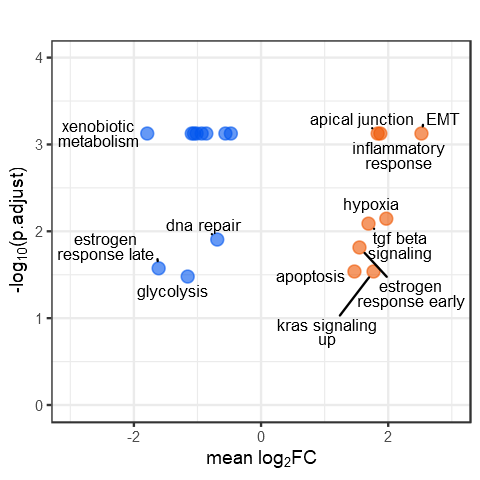

In [134]:
df_gsea <- as.data.frame(gsea_h_gene_sets)
idx <- order(df_gsea$p.adjust)
df_gsea <- df_gsea[idx,]

# deselection
f <- !grepl(paste0(c('TNFA','UV', 'COAGULATION','MYOGENESIS',
                    'BILE_ACID_METABOLISM', 
                    'MITOTIC_SPINDLE','ALLOGRAFT_REJECTION', 
                    'FATTY_ACID_METABOLISM','CHOLESTEROL_HOMEOSTASIS', 
                    'COMPLEMENT','IL2_STAT5_SIGNALING','IL6_JAK_STAT3_SIGNALING',
                    'HEME_METABOLISM','PEROXISOME'), collapse='|'),
        df_gsea$Description)
df_gsea <- df_gsea[f,]

df_gsea$meanlog2fc <- sapply(df_gsea$core_enrichment, function(x) {
    syms <- strsplit(x,'/')[[1]]
    return (mean(df_all[syms,'log2FCuntVStgfb.transcription'], na.rm = T)) })

point_alpha=0.6; point_size=3
xlab=expression('mean log'[2]*'FC'); ylab=expression('-log'[10]*'(p.adjust)'); title="";
xlim=c(-3,3); ylim=c(0,4)
df_gsea$sig <- 'no'; 
f_up <- df_gsea$p.adjust < 0.05 & df_gsea$meanlog2fc > 0.025
f_dn <- df_gsea$p.adjust < 0.05 & df_gsea$meanlog2fc < -0.025
df_gsea$sig[f_up] <- 'up';
df_gsea$sig[f_dn] <- 'dn';
head(df_gsea[f_up,,drop=F],100)
head(df_gsea[f_dn,,drop=F],100)

gg <- ggplot(data=df_gsea,
    aes(x=meanlog2fc, y=-log10(p.adjust), colour=sig)) +
    geom_point(alpha=point_alpha, size=point_size) +
    theme_bw() + ggtitle(title) +
    theme(legend.position = "none") +
    xlim(xlim) + ylim(ylim) +
    xlab(xlab) + ylab(ylab) +
    scale_colour_manual(values = c('no'='black','up'='#ee5500', 'dn'='#0055ee'))

require('ggrepel')
df_gsea$nudge_x <- 0.05
df_gsea$nudge_x[f_dn] <- -0.05 
df_gsea$nudge_y <- 0
f <- grepl("ANGIOGENESIS|APOPTOSIS", df_gsea$Description)
df_gsea[f, 'nudge_x'] <- -0.2
df_gsea[f, 'nudge_y'] <- -0.1

# change name
df_gsea$Description <- tolower(df_gsea$Description)
df_gsea$Description <- mgsub::mgsub(df_gsea$Description,
        tolower(c('HALLMARK','KEGG','EPITHELIAL_MESENCHYMAL_TRANSITION','_')),
        c('','','EMT',' '))
df_gsea$Description <- str_wrap(df_gsea$Description, width=15)

f <- df_gsea$sig != 'no'
if (any(f)) {
  df1 <- df_gsea[f,,drop=F]          
  gg <- gg + geom_text_repel(data=df1,
           aes(label=Description, lineheight=.75),
           size=3.5, colour='black',
           force=1, box.padding=0.25, point.padding=0.5,
           min.segment.length = unit(0, 'lines'),          
           nudge_x=df1$nudge_x, nudge_y=df1$nudge_y,
           seed=seed_geom_text_repel)
}
                       
print_figure(gg, width=4, height=4,
    file=sprintf("volcano_plot.%s.gsea", condstr))

### ***GSEA plot***

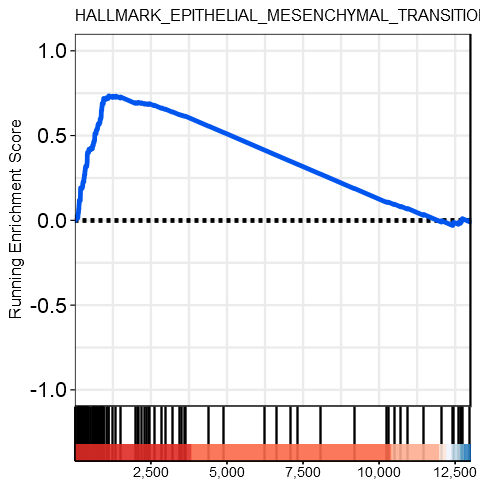

In [135]:
title <- "HALLMARK_EPITHELIAL_MESENCHYMAL_TRANSITION"
#title <- "HALLMARK_MTORC1_SIGNALING"
gg <- gseaplot3(gsea_h_gene_sets, geneSetID = title, title = title, color = "#0055ee", 
    base_size = 8, rel_heights = c(1.5, 0.25, 1), subplots = 1:2, pvalue_table = FALSE, 
    ES_geom = "line")

print_figure(gg, width = 4, height = 4, f_display2screen = TRUE, file = sprintf("gseaplot.transcription.%s.%s%s", 
    condstr, tolower(title), type_gmt))

In [136]:
f <- !grepl(paste0(c("TNFA", "UV", "COAGULATION", "MYOGENESIS", "BILE_ACID_METABOLISM", 
    "MITOTIC_SPINDLE", "ALLOGRAFT_REJECTION", "FATTY_ACID_METABOLISM", "CHOLESTEROL_HOMEOSTASIS", 
    "COMPLEMENT", "IL2_STAT5_SIGNALING", "IL6_JAK_STAT3_SIGNALING", "HEME_METABOLISM", 
    "PEROXISOME"), collapse = "|"), gsea_h_gene_sets$ID)
IDs <- gsea_h_gene_sets$ID[f]

for (ID in IDs) {
  verb('%s\n', ID)  
  title <- ID  
  gg <- gseaplot3(gsea_h_gene_sets, geneSetID = ID, title = title,
    color = "black", base_size = 8,
    rel_heights = c(1.5, 0.25, 1), subplots = 1:2, pvalue_table = FALSE,
    ES_geom = "line")

  print_figure(gg, width=4, height=4, f_display2screen=FALSE,
    file=sprintf("gseaplot.transcription.%s.%s", condstr, tolower(title)))
    }

HALLMARK_APICAL_JUNCTION
HALLMARK_EPITHELIAL_MESENCHYMAL_TRANSITION
HALLMARK_INFLAMMATORY_RESPONSE
HALLMARK_SPERMATOGENESIS
HALLMARK_XENOBIOTIC_METABOLISM
HALLMARK_ADIPOGENESIS
HALLMARK_G2M_CHECKPOINT
HALLMARK_OXIDATIVE_PHOSPHORYLATION
HALLMARK_MYC_TARGETS_V1
HALLMARK_MTORC1_SIGNALING
HALLMARK_E2F_TARGETS
HALLMARK_HYPOXIA
HALLMARK_TGF_BETA_SIGNALING
HALLMARK_DNA_REPAIR
HALLMARK_ESTROGEN_RESPONSE_EARLY
HALLMARK_ESTROGEN_RESPONSE_LATE
HALLMARK_KRAS_SIGNALING_UP
HALLMARK_APOPTOSIS
HALLMARK_GLYCOLYSIS


# Transcription TGFb Vs CX5461

In [137]:
condstr <- 'Transcription.tgfb.cx5461'

In [138]:
### GSEA analysis for Control Vs TGFB trnascription
library(clusterProfiler)
library(DOSE)
library(msigdbr)
library(enrichplot)
colnames(df_all)
nv <- sign(df_all$log2FCtgfbVStgfbCX5461.transcription)*(-log10(df_all$PtgfbVStgfbCX5461.transcription))
names(nv) <- rownames(df_all);
f <- is.finite(nv); t <- min(nv[f]); nv[nv < t] <- t*1.1; t <- max(nv[f]); nv[nv > t] <- t*1.1



gmt_mus <- msigdbr(species = "mouse", category = "C2", subcategory = "CP:KEGG") %>% 
  dplyr::select(gs_name, gene_symbol)

### 50 Hallmark pathway analysis; http://www.gsea-msigdb.org/gsea/msigdb/collection_details.jsp#H
h_gene_sets = msigdbr(species = "mouse", category = "H") %>%
  dplyr::select(gs_name, gene_symbol)

set.seed(seed_gsea)
gsea_all <- GSEA(sort(nv[!is.na(nv)], decreasing=T), exponent =1,
                 nPerm = 10000, minGSSize = 5, maxGSSize = 500,   
                 pvalueCutoff = 0.05, pAdjustMethod = "BH", 
                 TERM2GENE=gmt_mus, TERM2NAME=NA, seed=FALSE, by="fgsea")

head(gsea_all); dim(gsea_all)

gsea_h_gene_sets <- GSEA(sort(nv[!is.na(nv)], decreasing=T), exponent =1,
                         nPerm = 10000, minGSSize = 5, maxGSSize = 500,   
                         pvalueCutoff = 0.05, pAdjustMethod = "BH", 
                         TERM2GENE=h_gene_sets, TERM2NAME=NA, seed=FALSE, by="fgsea")
head(gsea_h_gene_sets); dim(gsea_h_gene_sets)

gsea_h_gene_sets@result %>% 
  dplyr::select(enrichmentScore,  NES, p.adjust) %>% 
  arrange(desc(enrichmentScore)) %>% 
  write.csv(., file = sprintf('table/%s.all.gsea.transcription.h%s.csv', condstr, type_gmt))



type_gmt <- ''
#fname_gmt <- sprintf("./data/msigdb_gmt_mouse%s/h.all.v6.1.symbols_mouse%s.gmt", type_gmt, type_gmt)
#gmt_h <- read.gmt(fname_gmt)

#set.seed(seed_gsea)
#gsea_all <- GSEA(sort(nv[!is.na(nv)], decreasing=T), exponent =1,
#                nPerm = 10000, minGSSize = 10, maxGSSize = 500,   
#                pvalueCutoff = 0.05, pAdjustMethod = "BH", 
#                TERM2GENE=gmt_h, TERM2NAME=NA, seed=FALSE, by="fgsea")
#gsea_all <- setReadable(gsea_all, OrgDb=org.Mm.eg.db, keyType="ENTREZID")

#head(gsea_all)
#dim(gsea_all)

write.table(gsea_h_gene_sets, file = sprintf('table/%s.all.gsea.transcription.h%s.txt', condstr, type_gmt),
            row.names = TRUE , col.names = NA ,  sep="\t"  , quote = FALSE  )

[1] "seqnames"                            
 [2] "start"                               
 [3] "end"                                 
 [4] "width"                               
 [5] "strand"                              
 [6] "source"                              
 [7] "unt.transcription"                   
 [8] "tgfb.transcription"                  
 [9] "tgfbCX5461.transcription"            
[10] "log2FCuntVStgfb.transcription"       
[11] "FDRuntVStgfb.transcription"          
[12] "PuntVStgfb.transcription"            
[13] "log2FCtgfbVStgfbCX5461.transcription"
[14] "FDRtgfbVStgfbCX5461.transcription"   
[15] "PtgfbVStgfbCX5461.transcription"     
[16] "unt.tgfb.DEtranscription"            
[17] "tgfb.tgfbCX5461.DEtranscription"     
[18] "reversible.transcription"            
[19] "unt.translation"                     
[20] "tgfb.translation"                    
[21] "tgfbCX5461.translation"              
[22] "log2FCuntVStgfb.translation"         
[23] "FDRuntVStgfb.translation"            
[24] "PuntVStgfb.translation"              
[25] "log2FCtgfbVStgfbCX5461.translation"  
[26] "FDRtgfbVStgfbCX5461.translation"     
[27] "PtgfbVStgfbCX5461.translation"       
[28] "unt.tgfb.DEtranslation"              
[29] "tgfb.tgfbCX5461.DEtranslation"       
[30] "reversible.translation"              
[31] "biotype"

preparing geneSet collections...

GSEA analysis...

Warning message in .GSEA(geneList = geneList, exponent = exponent, minGSSize = minGSSize, :
"We do not recommend using nPerm parameter incurrent and future releases"
Warning message in fgsea(pathways = geneSets, stats = geneList, nperm = nPerm, minSize = minGSSize, :
"You are trying to run fgseaSimple. It is recommended to use fgseaMultilevel. To run fgseaMultilevel, you need to remove the nperm argument in the fgsea function call."
Warning message in preparePathwaysAndStats(pathways, stats, minSize, maxSize, gseaParam, :
"There are ties in the preranked stats (0.36% of the list).
The order of those tied genes will be arbitrary, which may produce unexpected results."
leading edge analysis...

done...



,ID,Description,setSize,enrichmentScore,NES,pvalue,p.adjust,qvalues,rank,leading_edge,core_enrichment
,<chr>,<chr>,<int>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<chr>,<chr>
KEGG_LYSOSOME,KEGG_LYSOSOME,KEGG_LYSOSOME,105,0.6385298,2.110595,0.0001690617,0.007493412,0.005980861,1618,"tags=37%, list=12%, signal=33%",Ctsd/Atp6v0d1/Atp6ap1/Tpp1/Ctsa/Gaa/Lgmn/Atp6v0b/Ctsb/Man2b1/Hyal1/Atp6v0c/Igf2r/Gla/Ap3d1/Ap1b1/Abca2/Cd63/Gns/Psap/Gba/Tcirg1/Glb1/Mcoln1/Lamp1/Neu1/Arsa/Fuca1/Sgsh/Ctsz/Smpd1/Cltb/Slc11a1/Gm2a/Gnptg/Naga/Atp6v0a1/Asah1/Arsb
KEGG_DNA_REPLICATION,KEGG_DNA_REPLICATION,KEGG_DNA_REPLICATION,35,-0.7504325,-2.135530,0.0002189142,0.007493412,0.005980861,1620,"tags=54%, list=12%, signal=48%",Pole/Mcm2/Pole2/Pold2/Mcm7/Pold1/Rfc1/Fen1/Rfc4/Lig1/Dna2/Rpa1/Prim1/Mcm5/Mcm3/Pola1/Mcm4/Pcna/Mcm6
KEGG_SYSTEMIC_LUPUS_ERYTHEMATOSUS,KEGG_SYSTEMIC_LUPUS_ERYTHEMATOSUS,KEGG_SYSTEMIC_LUPUS_ERYTHEMATOSUS,75,-0.8245630,-2.722380,0.0002326664,0.007493412,0.005980861,665,"tags=64%, list=5%, signal=61%",H2bc12/Ssb/H2ac6/H4c4/Snrpd3/H2bc22/H3c15/H3c2/H2ac24/Macroh2a1/H3c13/H2ac22/H2ac15/H2bc15/H4c3/H3c11/H2ac7/H3c6/H4f16/H4c9/H4c12/Snrpd1/H4c6/H4c8/H2bc14/H2ac8/H4c14/H4c11/H3c1/H2ac10/H4c18/H2ac11/H2bc3/H2bc13/H2ac4/H3c3/H2ac20/H3c7/H3c10/H2bc11/H2bc18/H2ax/H4c2/H3c8/H2bc6/H2bc7/H2az1/H2bc8
KEGG_PYRIMIDINE_METABOLISM,KEGG_PYRIMIDINE_METABOLISM,KEGG_PYRIMIDINE_METABOLISM,87,-0.5679396,-1.914782,0.0002384927,0.007493412,0.005980861,1851,"tags=33%, list=14%, signal=29%",Prim2/Nme2/Polr3f/Uck2/Pole/Polr3b/Pole2/Pold2/Ak3/Pold1/Nudt2/Dhodh/Polr2b/Polr2d/Pnp2/Dtymk/Umps/Nt5e/Dck/Polr1a/Polr1b/Polr3k/Rrm1/Tk1/Prim1/Tyms/Pola1/Rrm2/Dut
KEGG_CELL_CYCLE,KEGG_CELL_CYCLE,KEGG_CELL_CYCLE,118,-0.5769687,-2.044696,0.0002449180,0.007493412,0.005980861,1538,"tags=45%, list=12%, signal=40%",Tgfb3/Mcm2/Ywhah/Tgfb2/Smad2/Stag2/Mcm7/Ywhaz/Anapc1/Skp2/Pkmyt1/Ywhae/Stag1/Orc5/Tfdp1/Orc2/Atm/Cdkn2d/Bub1/Hdac2/Cdc20/Pttg1/Cdc7/Cdc25c/Ccne2/Smc1a/Ttk/E2f3/Dbf4/Ywhaq/Chek2/Cdc45/Ccne1/Rbl1/Cdc6/Orc6/Ccnb2/Cdk1/Smc3/Cdk6/Mcm5/Mcm3/Rad21/Anapc5/Bub1b/Ccnb1/Mad2l1/Plk1/Mcm4/Pcna/Espl1/Ccna2/Mcm6
KEGG_SPLICEOSOME,KEGG_SPLICEOSOME,KEGG_SPLICEOSOME,121,-0.6365948,-2.261983,0.0002470356,0.007493412,0.005980861,2016,"tags=40%, list=16%, signal=35%",Prpf3/Snrnp200/Rbm8a/Magohb/Ddx42/Srsf10/Lsm8/U2af1/Snw1/Snrpc/Lsm6/Snrpd2/Snrnp70/Snu13/Aqr/Isy1/Hnrnpk/Rbm22/Rbm25/Hnrnpu/Thoc1/Snrpe/Snrpg/Dhx15/Alyref/Ppil1/Snrpa1/Ncbp2/Prpf40a/Cdc5l/Snrpd3/Srsf1/Srsf6/Lsm3/Prpf18/Rbmx/Usp39/Tra2b/Snrpf/Hnrnpm/Prpf19/Sf3a3/Sf3b3/Hnrnpa3/Srsf2/Srsf3/Snrpd1/Srsf7/Hnrnpa1


[1] 22 11

preparing geneSet collections...

GSEA analysis...

Warning message in .GSEA(geneList = geneList, exponent = exponent, minGSSize = minGSSize, :
"We do not recommend using nPerm parameter incurrent and future releases"
Warning message in fgsea(pathways = geneSets, stats = geneList, nperm = nPerm, minSize = minGSSize, :
"You are trying to run fgseaSimple. It is recommended to use fgseaMultilevel. To run fgseaMultilevel, you need to remove the nperm argument in the fgsea function call."
Warning message in preparePathwaysAndStats(pathways, stats, minSize, maxSize, gseaParam, :
"There are ties in the preranked stats (0.36% of the list).
The order of those tied genes will be arbitrary, which may produce unexpected results."
leading edge analysis...

done...



,ID,Description,setSize,enrichmentScore,NES,pvalue,p.adjust,qvalues,rank,leading_edge,core_enrichment
,<chr>,<chr>,<int>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<chr>,<chr>
HALLMARK_P53_PATHWAY,HALLMARK_P53_PATHWAY,HALLMARK_P53_PATHWAY,179,0.7086431,2.506404,0.0001615509,0.001031694,0.0004561172,1002,"tags=34%, list=8%, signal=32%",Btg2/Ccng1/Cdkn1a/Ctsd/Ephx1/Itgb4/Mdm2/Zmat3/Abhd4/Plk2/Osgin1/Perp/Lif/Bax/Cd81/Dcxr/Phlda3/Tcn2/Hmox1/Tob1/Txnip/Aen/Jun/Rhbdf2/Plxnb2/Epha2/Ptpn14/Ppp1r15a/Ndrg1/Ninj1/Traf4/Slc19a2/Pvt1/Blcap/Rps27l/Pmm1/Atf3/Slc3a2/S100a10/Ccnd2/Ak1/Eps8l2/Foxo3/Rack1/Hras/Ei24/Sertad3/Pidd1/Zfp36l1/Ier5/Prmt2/Ddit3/H2aj/Xpc/Mxd1/App/Fuca1/Klf4/Cdkn2a/Mapkapk3/Rpl18
HALLMARK_HYPOXIA,HALLMARK_HYPOXIA,HALLMARK_HYPOXIA,160,0.5162490,1.800862,0.0001637465,0.001031694,0.0004561172,1231,"tags=26%, list=9%, signal=23%",Cdkn1a/Tnfaip3/Plin2/Aldoa/Ccn1/Eno3/Hmox1/Fosl2/Tgm2/Jun/Bhlhe40/Dusp1/Ppp1r15a/Ndrg1/F3/Gaa/Atf3/Cav1/Gapdh/Slc25a1/Foxo3/Hk1/Angptl4/Pdgfb/Prdx5/Ddit3/Maff/Plaur/Pnrc1/Vldlr/Nagk/Ndst1/Egfr/Pgm1/Nedd4l/Ilvbl/Fos/Klf6/Gpi1/Tpbg/Grhpr
HALLMARK_TNFA_SIGNALING_VIA_NFKB,HALLMARK_TNFA_SIGNALING_VIA_NFKB,HALLMARK_TNFA_SIGNALING_VIA_NFKB,157,0.6678276,2.325262,0.0001638538,0.001031694,0.0004561172,1221,"tags=32%, list=9%, signal=29%",Btg2/Cdkn1a/Sqstm1/Tnfaip3/Plk2/Lif/Gadd45b/Ccn1/Ccl2/Csf1/Fosl2/Ehd1/Lamb3/Dusp4/Jun/Bhlhe40/Dusp1/Rela/Ppp1r15a/Phlda1/Nfkbia/Litaf/F3/Ninj1/Clcf1/Atf3/Ets2/Nfkb2/Map2k3/Bcl6/Areg/Ier5/Edn1/Cebpb/Dusp5/Maff/Plaur/Inhba/Pnrc1/Ccnd1/Mxd1/Sgk1/Klf10/Relb/Klf4/Dennd5a/Tnip1/Fos/Klf6/Socs3
HALLMARK_APOPTOSIS,HALLMARK_APOPTOSIS,HALLMARK_APOPTOSIS,121,0.5162481,1.741163,0.0001669170,0.001031694,0.0004561172,996,"tags=22%, list=8%, signal=21%",Btg2/Cdkn1a/Gsn/Sqstm1/Lgals3/Bax/Gpx4/Gadd45b/Bcl2l1/Hmox1/Txnip/Jun/Rela/Pmaip1/Atf3/Cav1/Ccnd2/Igf2r/Clu/Tnfrsf12a/Lmna/Timp1/Ddit3/Ccnd1/App/Tspo/Smad7
HALLMARK_APICAL_JUNCTION,HALLMARK_APICAL_JUNCTION,HALLMARK_APICAL_JUNCTION,124,0.5611430,1.896615,0.0001670565,0.001031694,0.0004561172,550,"tags=19%, list=4%, signal=19%",Itgb4/Bmp1/Itga3/Vcl/Lamb3/Actn1/Nectin2/Zyx/Flnc/Exoc4/Cnn2/Acta1/Actn4/Src/Pcdh1/Vwf/Pkd1/Pfn1/Nectin1/Cap1/Hras/Rras/Sympk/Inppl1
HALLMARK_MYOGENESIS,HALLMARK_MYOGENESIS,HALLMARK_MYOGENESIS,122,0.6281661,2.119270,0.0001674481,0.001031694,0.0004561172,1018,"tags=26%, list=8%, signal=24%",Cdkn1a/Gsn/Itgb4/Ptp4a3/Gadd45b/Agrn/Eno3/Myo1c/Atp6ap1/Tsc2/Plxnb2/Bhlhe40/Mapre3/Gaa/Sorbs1/Acta1/Slc6a8/Ak1/Flii/Ncam1/Fst/Clu/Smtn/Gnao1/Col4a2/Igfbp7/Pde4dip/App/Gabarapl2/Pdlim7/Kifc3/Cox7a1


[1] 29 11

## ***volcano plot***

,ID,Description,setSize,enrichmentScore,NES,pvalue,p.adjust,qvalues,rank,leading_edge,core_enrichment,meanlog2fc,sig
,<chr>,<chr>,<int>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<chr>,<chr>,<dbl>,<chr>
HALLMARK_P53_PATHWAY,HALLMARK_P53_PATHWAY,HALLMARK_P53_PATHWAY,179,0.7086431,2.506404,0.0001615509,0.001031694,0.0004561172,1002,"tags=34%, list=8%, signal=32%",Btg2/Ccng1/Cdkn1a/Ctsd/Ephx1/Itgb4/Mdm2/Zmat3/Abhd4/Plk2/Osgin1/Perp/Lif/Bax/Cd81/Dcxr/Phlda3/Tcn2/Hmox1/Tob1/Txnip/Aen/Jun/Rhbdf2/Plxnb2/Epha2/Ptpn14/Ppp1r15a/Ndrg1/Ninj1/Traf4/Slc19a2/Pvt1/Blcap/Rps27l/Pmm1/Atf3/Slc3a2/S100a10/Ccnd2/Ak1/Eps8l2/Foxo3/Rack1/Hras/Ei24/Sertad3/Pidd1/Zfp36l1/Ier5/Prmt2/Ddit3/H2aj/Xpc/Mxd1/App/Fuca1/Klf4/Cdkn2a/Mapkapk3/Rpl18,0.4976180,up
HALLMARK_HYPOXIA,HALLMARK_HYPOXIA,HALLMARK_HYPOXIA,160,0.5162490,1.800862,0.0001637465,0.001031694,0.0004561172,1231,"tags=26%, list=9%, signal=23%",Cdkn1a/Tnfaip3/Plin2/Aldoa/Ccn1/Eno3/Hmox1/Fosl2/Tgm2/Jun/Bhlhe40/Dusp1/Ppp1r15a/Ndrg1/F3/Gaa/Atf3/Cav1/Gapdh/Slc25a1/Foxo3/Hk1/Angptl4/Pdgfb/Prdx5/Ddit3/Maff/Plaur/Pnrc1/Vldlr/Nagk/Ndst1/Egfr/Pgm1/Nedd4l/Ilvbl/Fos/Klf6/Gpi1/Tpbg/Grhpr,0.3642034,up
HALLMARK_APOPTOSIS,HALLMARK_APOPTOSIS,HALLMARK_APOPTOSIS,121,0.5162481,1.741163,0.0001669170,0.001031694,0.0004561172,996,"tags=22%, list=8%, signal=21%",Btg2/Cdkn1a/Gsn/Sqstm1/Lgals3/Bax/Gpx4/Gadd45b/Bcl2l1/Hmox1/Txnip/Jun/Rela/Pmaip1/Atf3/Cav1/Ccnd2/Igf2r/Clu/Tnfrsf12a/Lmna/Timp1/Ddit3/Ccnd1/App/Tspo/Smad7,0.4284557,up
HALLMARK_APICAL_JUNCTION,HALLMARK_APICAL_JUNCTION,HALLMARK_APICAL_JUNCTION,124,0.5611430,1.896615,0.0001670565,0.001031694,0.0004561172,550,"tags=19%, list=4%, signal=19%",Itgb4/Bmp1/Itga3/Vcl/Lamb3/Actn1/Nectin2/Zyx/Flnc/Exoc4/Cnn2/Acta1/Actn4/Src/Pcdh1/Vwf/Pkd1/Pfn1/Nectin1/Cap1/Hras/Rras/Sympk/Inppl1,0.3378942,up
HALLMARK_INFLAMMATORY_RESPONSE,HALLMARK_INFLAMMATORY_RESPONSE,HALLMARK_INFLAMMATORY_RESPONSE,98,0.5865696,1.918991,0.0001702707,0.001031694,0.0004561172,1428,"tags=28%, list=11%, signal=25%",Btg2/Cdkn1a/Lif/Ccl7/Ccl2/Csf1/Dcbld2/Rela/Nfkbia/F3/Itga5/Axl/P2ry2/Timp1/Edn1/Tapbp/Plaur/Inhba/Mxd1/Mmp14/Pvr/Sgms2/Klf6/Tpbg/Rhog/Sphk1/Cd82,0.4676578,up
HALLMARK_ADIPOGENESIS,HALLMARK_ADIPOGENESIS,HALLMARK_ADIPOGENESIS,175,0.4659367,1.642677,0.0004870130,0.001674481,0.0007402968,2225,"tags=30%, list=17%, signal=25%",Gpx4/Plin2/Aldoa/Ubc/Tob1/Uqcrc1/Sorbs1/Aldh2/Slc25a1/Me1/Bcl6/Angptl4/Vegfb/Uck1/Etfb/Phldb1/Por/Bckdha/Abcb8/Nabp1/Acads/Cd151/Pgm1/Slc25a10/Dgat1/Tkt/Miga2/Lpcat3/Stom/Coq9/Samm50/Esyt1/Mtarc2/Baz2a/Retsat/Pqlc3/Cpt2/Ywhag/Ccng2/Acox1/Uqcrq/Mylk/Riok3/Tst/Chchd10/Esrra/Rab34/Ucp2/Adipor2/Gbe1/Rnf11/Orm1,0.2601835,up
HALLMARK_EPITHELIAL_MESENCHYMAL_TRANSITION,HALLMARK_EPITHELIAL_MESENCHYMAL_TRANSITION,HALLMARK_EPITHELIAL_MESENCHYMAL_TRANSITION,117,0.4649424,1.558630,0.0038668460,0.010257749,0.0045350049,1137,"tags=24%, list=9%, signal=22%",Fbln2/Tnfaip3/Ecm1/Bmp1/Gadd45b/Ccn1/Tgm2/Glipr1/Jun/Flna/Fn1/Itga5/Slc6a8/Tpm1/Tnfrsf12a/Areg/Timp1/Basp1/Capg/Col4a2/Plaur/Inhba/Fuca1/Mmp14/Lrp1/Pvr/Cald1/Pmp22,0.3140965,up
HALLMARK_ESTROGEN_RESPONSE_EARLY,HALLMARK_ESTROGEN_RESPONSE_EARLY,HALLMARK_ESTROGEN_RESPONSE_EARLY,151,0.4101339,1.421808,0.0113226124,0.025733210,0.0113767876,1884,"tags=23%, list=14%, signal=20%",Krt19/Flnb/Aldh3b1/Tgm2/Tob1/Bhlhe40/Pmaip1/Slc19a2/Gla/P2ry2/Prss23/Cyp26b1/Areg/Fasn/Fhl2/Esrp2/Ccnd1/Klf10/Klf4/Retreg1/Abca3/Tjp3/Fos/Arl3/Tpbg/Anxa9/Slc39a6/B4galt1/Rhod/Mindy1/Ablim1/Tpd52l1/Siah2/Syngr1/Adcy9,0.4502162,up
HALLMARK_OXIDATIVE_PHOSPHORYLATION,HALLMARK_OXIDATIVE_PHOSPHORYLATION,HALLMARK_OXIDATIVE_PHOSPHORYLATION,196,0.3867686,1.380421,0.0128040973,0.027834994,0.0123059974,1643,"tags=18%, list=13%, signal=16%",Bax/Gpx4/Atp6ap1/Atp6v0e/Uqcrc1/Mfn2/Atp6v0b/Surf1/Atp6v0c/Atp6v1e1/Cpt1a/Alas1/Htra2/Atp6v1f/Slc25a11/Tcirg1/Pmpca/Ndufa7/Mrps12/Etfb/Por/Cox4i1/Bckdha/Slc25a3/Ndufb4/Ndufs2/Gpi1/Acadvl/Ndufa6/Ndufa1/Phb2/Etfdh/Atp6v1c1/Ndufa8/Retsat,0.2677959,up


,ID,Description,setSize,enrichmentScore,NES,pvalue,p.adjust,qvalues,rank,leading_edge,core_enrichment,meanlog2fc,sig
,<chr>,<chr>,<int>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<chr>,<chr>,<dbl>,<chr>
HALLMARK_MYC_TARGETS_V2,HALLMARK_MYC_TARGETS_V2,HALLMARK_MYC_TARGETS_V2,58,-0.6330810,-1.990134,0.0002271179,0.001031694,0.0004561172,928,"tags=31%, list=7%, signal=29%",Gnl3/Srm/Tcof1/Wdr43/Tmem97/Cbx3/Npm1/Plk4/Ung/Rcl1/Hspd1/Hspe1/Nolc1/Mcm5/Nop56/Las1l/Plk1/Mcm4,-0.3739242,dn
HALLMARK_SPERMATOGENESIS,HALLMARK_SPERMATOGENESIS,HALLMARK_SPERMATOGENESIS,58,-0.6165671,-1.938221,0.0002271179,0.001031694,0.0004561172,2412,"tags=43%, list=19%, signal=35%",Braf/Spata6/Cdkn3/Nphp1/Psmg1/Aurka/Hspa4l/Coil/Gmcl1/Mlf1/Bub1/Rfc4/Tsn/Topbp1/Nek2/Mllt10/Nf2/Ncaph/Ezh2/Ttk/Dbf4/Prkar2a/Ccnb2/Cdk1/Kif2c,-0.4422367,dn
HALLMARK_G2M_CHECKPOINT,HALLMARK_G2M_CHECKPOINT,HALLMARK_G2M_CHECKPOINT,197,-0.7629918,-2.879405,0.0002674512,0.001031694,0.0004561172,1236,"tags=53%, list=10%, signal=49%",Top2a/Stag1/Tmpo/Orc5/Tfdp1/Syncrip/Hnrnpd/Hnrnpu/Gins2/Bub1/Dkc1/Ss18/Dtymk/Nasp/Map3k20/Xpo1/Mt2/Cdc20/Pbk/Ythdc1/H2bc12/Nek2/Atrx/Rasal2/Amd1/Pttg1/Ncl/Sfpq/Hmmr/Slc7a5/Lbr/Rad54l/Smc4/Hmgn2/Exo1/Ezh2/Cdc7/Smc1a/Kpnb1/Ilf3/Ttk/Nsd2/E2f3/G3bp1/Hmga1/Dbf4/Slc38a1/Ctcf/Cbx1/Srsf1/Plk4/Cks1b/Cdc45/Tra2b/Kif4/Kif15/Rbl1/Cdc6/Ndc80/Nusap1/Orc6/Nolc1/Bard1/Fbxo5/Ccnb2/Cdk1/Smc2/Ccnf/Kpna2/Srsf2/Marcks/Mcm5/Tpx2/Mcm3/Cks2/Snrpd1/Kif20b/Prc1/Kif11/Kif2c/Birc5/Cenpe/Ewsr1/Smarcc1/Tacc3/Rad21/Knl1/Mybl2/Aurkb/Cenpf/Incenp/Kif22/Kif23/Mad2l1/Plk1/H2ax/Lmnb1/Hmgb3/Stmn1/Espl1/H2az1/Mki67/Ccna2/Mcm6/Racgap1,-0.5194295,dn
HALLMARK_E2F_TARGETS,HALLMARK_E2F_TARGETS,HALLMARK_E2F_TARGETS,200,-0.7998340,-3.021083,0.0002681684,0.001031694,0.0004561172,1386,"tags=62%, list=11%, signal=56%",Mthfd2/Pold2/Mcm7/Tubg1/Slbp/Top2a/Zw10/Stag1/Tmpo/Gins4/Mre11a/Pold1/Ube2t/Orc2/Syncrip/Hnrnpd/Eif2s1/Xrcc6/Cit/Rfc1/Cse1l/Mms22l/Luc7l3/Prps1/Tcf19/Psip1/Nasp/Spc25/Xpo1/Shmt1/Cdc20/Pnn/Asf1a/Spag5/Pttg1/Depdc1a/Nap1l1/Hmmr/Lbr/Lig1/Smc4/Spc24/Cenpm/Ezh2/Asf1b/Smc1a/Ilf3/Dck/Hmga1/Nup107/Ctcf/Srsf1/Chek2/Mxd3/Plk4/Cks1b/Ung/Nup153/Tipin/Tubb5/Brca1/Tra2b/Kif4/Ccne1/Donson/Rpa1/Msh2/Tk1/Orc6/Nolc1/Bard1/Ssrp1/Ccnb2/Cdk1/Usp1/Smc3/Kpna2/Srsf2/Dnmt1/Mcm5/Ranbp1/E2f8/Mcm3/Trip13/Atad2/Cks2/Rrm2/Prdx4/Cdca3/Ran/Nop56/Hmgb2/Kif2c/Birc5/Paics/Cdca8/Cenpe/Melk/Tacc3/Rad21/Mybl2/Aurkb/Cbx5/Dek/Kif22/Bub1b/Ncapd2/Mad2l1/Anp32e/Plk1/Dut/H2ax/Lmnb1/Mcm4/Tfrc/Pcna/Hmgb3/Stmn1/Espl1/H2az1/Mki67/Mcm6/Racgap1,-0.5121436,dn
HALLMARK_MYC_TARGETS_V1,HALLMARK_MYC_TARGETS_V1,HALLMARK_MYC_TARGETS_V1,201,-0.7259449,-2.745302,0.0002682403,0.001031694,0.0004561172,1501,"tags=47%, list=12%, signal=42%",Xpot/Mcm2/U2af1/Eif4e/Snrpd2/Gnl3/Pold2/Psma1/Mcm7/Eif1ax/Srm/C1qbp/Rps2/Ruvbl2/Ywhae/Psmd14/Tfdp1/Orc2/Ppm1g/Syncrip/Hnrnpd/Eif2s1/Psma7/Hnrnpu/Psmd1/Xrcc6/Uba2/Cstf2/Tardbp/Snrpg/Xpo1/Dhx15/Hdac2/Rfc4/Clns1a/Cdc20/Snrpa1/Cbx3/Ssb/Kars/Ncbp2/Cct3/Nap1l1/Snrpd3/Kpnb1/Cct4/G3bp1/Npm1/Ywhaq/Srsf1/Eif4g2/Psmd7/Cdc45/Tra2b/Tcp1/Cct5/Glo1/Serbp1/Hspd1/Rrm1/Hspe1/Ddx21/Nolc1/Sf3b3/Tomm70a/Tyms/Usp1/Kpna2/Hnrnpa3/Vdac1/Srsf2/Mcm5/Ranbp1/Ilf2/Ptges3/Pabpc4/Srsf3/Snrpd1/Prdx4/Ran/Nop56/Set/Smarcc1/Srsf7/Hnrnpa2b1/Dek/Mad2l1/Dut/Mcm4/Pcna/Hnrnpa1/H2az1/Ccna2/Mcm6,-0.3052013,dn
HALLMARK_UNFOLDED_PROTEIN_RESPONSE,HALLMARK_UNFOLDED_PROTEIN_RESPONSE,HALLMARK_UNFOLDED_PROTEIN_RESPONSE,110,-0.4277243,-1.494139,0.0088365243,0.021039344,0.0093016045,1915,"tags=35%, list=15%, signal=30%",Kdelr3/Tars/Srpr/Eif4a1/Cnot4/Aldh18a1/Ssr1/Xpot/Cnot2/Eif4e/Pdia5/Mthfd2/Fkbp14/Ywhaz/Eif2s1/Sec11a/Exosc2/Exosc10/Dkc1/Slc30a5/Asns/Nfya/Slc7a5/Eif4a2/Npm1/Hsp90b1/Spcs3/Cks1b/Xbp1/Fus/Nolc1/Cnot6/Dnajc3/Nop56/Psat1/Hspa5/Pdia6/H2ax,-0.2631943,dn
HALLMARK_MTORC1_SIGNALING,HALLMARK_MTORC1_SIGNALING,HALLMARK_MTORC1_SIGNALING,194,-0.3529223,-1.328960,0.0234666667,0.040459770,0.0178874773,2417,"tags=38%, list=19%, signal=31%",Cyb5b/Sqle/Tcea1/Pdk1/Edem1/Gsk3b/Sc5d/Eprs/Sla/Serp1/Qdpr/Rdh11/Fdxr/Pitpnb/Fkbp2/Rab1a/Acsl3/Pik3r3/Nup205/Psph/Psmg1/Skap2/Gsr/Aurka/Lt

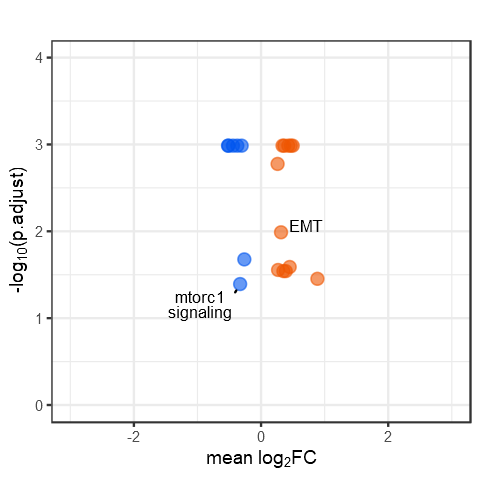

In [139]:
df_gsea <- as.data.frame(gsea_h_gene_sets)
idx <- order(df_gsea$p.adjust)
df_gsea <- df_gsea[idx,]

# deselection
f <- !grepl(paste0(c('TNFA','UV', 'COAGULATION','MYOGENESIS',
                    'BILE_ACID_METABOLISM', 
                    'MITOTIC_SPINDLE','ALLOGRAFT_REJECTION', 
                    'FATTY_ACID_METABOLISM','CHOLESTEROL_HOMEOSTASIS', 
                    'COMPLEMENT','IL2_STAT5_SIGNALING','IL6_JAK_STAT3_SIGNALING',
                    'HEME_METABOLISM','PEROXISOME'), collapse='|'),
        df_gsea$Description)
df_gsea <- df_gsea[f,]

df_gsea$meanlog2fc <- sapply(df_gsea$core_enrichment, function(x) {
    syms <- strsplit(x,'/')[[1]]
    return (mean(df_all[syms,'log2FCtgfbVStgfbCX5461.transcription'], na.rm = T)) })

point_alpha=0.6; point_size=3
xlab=expression('mean log'[2]*'FC'); ylab=expression('-log'[10]*'(p.adjust)'); title="";
xlim=c(-3,3); ylim=c(0,4)
df_gsea$sig <- 'no'; 
f_up <- df_gsea$p.adjust < 0.05 & df_gsea$meanlog2fc > 0.025
f_dn <- df_gsea$p.adjust < 0.05 & df_gsea$meanlog2fc < -0.025
df_gsea$sig[f_up] <- 'up';
df_gsea$sig[f_dn] <- 'dn';
head(df_gsea[f_up,,drop=F],100)
head(df_gsea[f_dn,,drop=F],100)

gg <- ggplot(data=df_gsea,
    aes(x=meanlog2fc, y=-log10(p.adjust), colour=sig)) +
    geom_point(alpha=point_alpha, size=point_size) +
    theme_bw() + ggtitle(title) +
    theme(legend.position = "none") +
    xlim(xlim) + ylim(ylim) +
    xlab(xlab) + ylab(ylab) +
    scale_colour_manual(values = c('no'='black','up'='#ee5500', 'dn'='#0055ee'))

require('ggrepel')
df_gsea$nudge_x <- 0.05
df_gsea$nudge_x[f_dn] <- -0.05 
df_gsea$nudge_y <- 0
f <- grepl("ANGIOGENESIS|APOPTOSIS", df_gsea$Description)
df_gsea[f, 'nudge_x'] <- -0.2
df_gsea[f, 'nudge_y'] <- -0.1

# change name
df_gsea$Description <- tolower(df_gsea$Description)
df_gsea$Description <- mgsub::mgsub(df_gsea$Description,
        tolower(c('HALLMARK','KEGG','EPITHELIAL_MESENCHYMAL_TRANSITION','_')),
        c('','','EMT',' '))
df_gsea$Description <- str_wrap(df_gsea$Description, width=15)

f <- df_gsea$sig != 'no'
if (any(f)) {
  df1 <- df_gsea[f,,drop=F]          
  gg <- gg + geom_text_repel(data=df1,
           aes(label=Description, lineheight=.75),
           size=3.5, colour='black',
           force=1, box.padding=0.25, point.padding=0.5,
           min.segment.length = unit(0, 'lines'),          
           nudge_x=df1$nudge_x, nudge_y=df1$nudge_y,
           seed=seed_geom_text_repel)
}
                       
print_figure(gg, width=4, height=4,
    file=sprintf("volcano_plot.%s.gsea", condstr))

### ***GSEA plot***

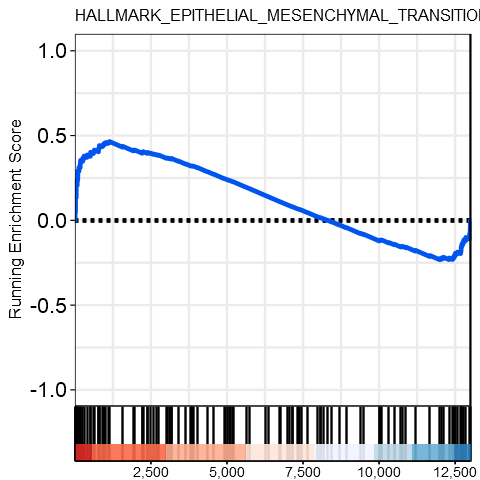

In [140]:
title <- "HALLMARK_EPITHELIAL_MESENCHYMAL_TRANSITION"
#title <- "HALLMARK_MTORC1_SIGNALING"
gg <- gseaplot3(gsea_h_gene_sets, geneSetID = title, title = title, color = "#0055ee", 
    base_size = 8, rel_heights = c(1.5, 0.25, 1), subplots = 1:2, pvalue_table = FALSE, 
    ES_geom = "line")

print_figure(gg, width = 4, height = 4, f_display2screen = TRUE, file = sprintf("gseaplot.transcription.%s.%s%s", 
    condstr, tolower(title), type_gmt))

In [141]:
f <- !grepl(paste0(c("TNFA", "UV", "COAGULATION", "MYOGENESIS", "BILE_ACID_METABOLISM", 
    "MITOTIC_SPINDLE", "ALLOGRAFT_REJECTION", "FATTY_ACID_METABOLISM", "CHOLESTEROL_HOMEOSTASIS", 
    "COMPLEMENT", "IL2_STAT5_SIGNALING", "IL6_JAK_STAT3_SIGNALING", "HEME_METABOLISM", 
    "PEROXISOME"), collapse = "|"), gsea_h_gene_sets$ID)
IDs <- gsea_h_gene_sets$ID[f]

for (ID in IDs) {
  verb('%s\n', ID)  
  title <- ID  
  gg <- gseaplot3(gsea_h_gene_sets, geneSetID = ID, title = title,
    color = "black", base_size = 8,
    rel_heights = c(1.5, 0.25, 1), subplots = 1:2, pvalue_table = FALSE,
    ES_geom = "line")

  print_figure(gg, width=4, height=4, f_display2screen=FALSE,
    file=sprintf("gseaplot.transcription.%s.%s", condstr, tolower(title)))
    }

HALLMARK_P53_PATHWAY
HALLMARK_HYPOXIA
HALLMARK_APOPTOSIS
HALLMARK_APICAL_JUNCTION
HALLMARK_INFLAMMATORY_RESPONSE
HALLMARK_MYC_TARGETS_V2
HALLMARK_SPERMATOGENESIS
HALLMARK_G2M_CHECKPOINT
HALLMARK_E2F_TARGETS
HALLMARK_MYC_TARGETS_V1
HALLMARK_ADIPOGENESIS
HALLMARK_EPITHELIAL_MESENCHYMAL_TRANSITION
HALLMARK_UNFOLDED_PROTEIN_RESPONSE
HALLMARK_ESTROGEN_RESPONSE_EARLY
HALLMARK_OXIDATIVE_PHOSPHORYLATION
HALLMARK_XENOBIOTIC_METABOLISM
HALLMARK_KRAS_SIGNALING_UP
HALLMARK_INTERFERON_GAMMA_RESPONSE
HALLMARK_MTORC1_SIGNALING
